<div style= "background-color: #f8f9fa; color: #333; padding: 15px;">
    <a class="anchor" id="1st-bullet"></a>
    <h3 style="color: #198754;font-weight: bold;">DATA MINING GROUP PROJECT</h3>
    <h2 style="color: #198754; font-weight: bold;">ABCDEats Inc. Final Report</h3>
    <h3 style="color: #198754;">Group 20</h3>
    Afonso Gamito, 20240752 <br>
    Gonçalo Pacheco, 20240695<br>
    Hassan Bhatti, 20241023<br>
    Moeko Mitani, 20240670 <br>
</div>

# Index

- [Importing the Libraries and CVS file](#1) 
- [1. Checking The Dataset](#2)
    - [1.1. Metadata](#3)
    - [1.2. Issues in The Dataset](#4)
- [2. Data Visualization](#5)
- [3. Key Statistics and Trends](#6)
- [4. Data Pre-Processing 1](#7)
    - [4.1. Treating Missing Values](#8)
    - [4.2. Changing Data Types](#9)
    - [4.3. Dropping Duplicates](#10)
    - [4.4. Dropping Customers with No Order](#11)
- [5. Outliers](#12) 
- [6. New Features Creation](#13)
    - [6.1. days_as_customer](#14)
    - [6.2. money_spent](#15)
    - [6.3. customer_city](#16)
    - [6.4. total_orders](#17)
    - [6.5. average_purchase](#18)
    - [6.6. age_group](#19)
    - [6.7. morning_orders, afternoon_orders, evening_orders, night_orders](#20)
    - [6.8. customer_frequency](#21)
    - [6.9. customer_preference](#22)
    - [6.10. order_frequency](#23)
    - [6.11. weekend_orders](#24)
    - [6.12. week_orders](#25)
    - [6.13. Display New Features](#26)
- [7. Data Pre-Processing 2](#27)
    - [7.1. Checking The Dataset](#28)
    - [7.2. Visualization of New Features](#29)
    - [7.3. Treating Outliers of New Features ](#30)
- [8. Feature Engineering](#31)
    - [8.1. Dropping Features](#32)
    - [8.2. Changing Data Types](#33)
    - [8.3. Splitting Metric Features and Non-Metric Features](#34)
- [9. Data Scaling](#35)
- [10. Checking Redundancy and Relevancy](#36)

# Acknowledgement

In this project, we got help from ChatGPT with some python codes.

<a class="anchor" id="1">     

# Importing the Libraries and CVS file

</a>    

In [1]:
## Libraries
import pandas as pd
import os
import numpy as np
from math import ceil

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Scaling
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import CVS file
file_path = 'project_data/DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)

<a class="anchor" id="2">     

# 1. Checking The Dataset
</a>    

<a class="anchor" id="3">     

## 1.1. Metadata
</a>    

The dataset contains the customer data from ABCDEats Inc. collected over three months from three cities.

| Feature | Feature description |
|---------|---------------------|
| *customer_id* | Unique identifier for each customer.|
| *customer_region* | Geographic region where the customer is located.|
| *customer_age* | Age of the customer.|
| *vendor_count* | Number of unique vendors the customer has ordered from.|
| *product_count* | Total number of products the customer has ordered.|
| *is_chain* | Indicates whether the customer’s order was from a chain restaurant.|
| *first_order* | Number of days from the start of the dataset when the customer first placed an order.|
| *last_order* | Number of days from the start of the dataset when the customer most recently placed an order.|
| *last_promo* | The category of the promotion or discount most recently used by the customer.|
| *payment_method* | Method most recently used by the customer to pay for their orders.|
| *CUI_American* | The amount in monetary units spent by the customer from the American cuisine.|
| *CUI_Asian* | The amount in monetary units spent by the customer from the Asian cuisine.|
|*CUI_Beverages* | The amount in monetary units spent by the customer from the Beverages|
| *CUI_Cafe* | The amount in monetary units spent by the customer from the Cafe.|
| *CUI_Chicken Dishes* | The amount in monetary units spent by the customer from the Chicken Dishes.|
| *CUI_Chinese* | The amount in monetary units spent by the customer from the Chinese cuisine.|
| *CUI_Desserts* | The amount in monetary units spent by the customer from the Desserts.|
| *CUI_Healthy* | The amount in monetary units spent by the customer from the Healthy cuisine.|
| *CUI_Indian* | The amount in monetary units spent by the customer from the Indian cuisine.|
| *CUI_Italian* | The amount in monetary units spent by the customer from the Italian cuisine.|
| *CUI_Japanese* | The amount in monetary units spent by the customer from the Japanese cuisine.|
| *CUI_Noodle Dishes* | The amount in monetary units spent by the customer from the Noodle Dishes.|
| *CUI_OTHER* | The amount in monetary units spent by the customer from the Other cuisine.|
| *CUI_Street Food / Snacks* | The amount in monetary units spent by the customer from the Street Food / Snacks.|
| *CUI_Thai* | The amount in monetary units spent by the customer from the Thai cuisine.|
| *DOW_0* | Number of orders placed on each day of Sunday.|
| *DOW_1* | Number of orders placed on each day of Monday.|
| *DOW_2* | Number of orders placed on each day of Tuesday.|
| *DOW_3* | Number of orders placed on each day of Wednesday.|
| *DOW_4* | Number of orders placed on each day of Thursday.|
| *DOW_5* | Number of orders placed on each day of Friday.|
| *DOW_6* | Number of orders placed on each day of Saturday.|
| *HR_0* | Number of orders placed during 12AM.|
| *HR_1* | Number of orders placed during 1AM.|
| *HR_2* | Number of orders placed during 2AM.|
| *HR_3* | Number of orders placed during 3AM.|
| *HR_4* | Number of orders placed during 4AM.|
| *HR_5* | Number of orders placed during 5AM.|
| *HR_6* | Number of orders placed during 6AM.|
| *HR_7* | Number of orders placed during 7AM.|
| *HR_8* | Number of orders placed during 8AM.|
| *HR_9* | Number of orders placed during 9AM.|
| *HR_10* | Number of orders placed during 10AM.|
| *HR_11* | Number of orders placed during 11AM.|
| *HR_12* | Number of orders placed during 12PM.|
| *HR_13* | Number of orders placed during 1PM.|
| *HR_14* | Number of orders placed during 2PM.|
| *HR_15* | Number of orders placed during 3PM.|
| *HR_16* | Number of orders placed during 4PM.|
| *HR_17* | Number of orders placed during 5PM.|
| *HR_18* | Number of orders placed during 6PM.|
| *HR_19* | Number of orders placed during 7PM.|
| *HR_20* | Number of orders placed during 8PM.|
| *HR_21* | Number of orders placed during 9PM.|
| *HR_22* | Number of orders placed during 10PM.|
| *HR_23* | Number of orders placed during 11PM.|

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

There are 56 features and 31888 lows in the dataset.

In [4]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Observations: {df.shape[0]}")

Dataset Shape: (31888, 56)
Number of Features: 56
Number of Observations: 31888


In [5]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [7]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

In [8]:
df.describe(include = "object")

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


<a class="anchor" id="4">     

## 1.2. Issues in the dataset 
</a>    

We found the issues below in the dataset in the previous report:<br><br>

**Missing Values**
- ***customer_age***: 727 (NaN)
- ***first_order***: 106 (NaN)
- ***HR_0***: 1165 (NaN)
- ***customer_region***: 442 (-)
- ***last_promo***: 16748 (-)

**Wrong Data Types**
- ***customer_age*** should be int instead of float
- ***vendor_count*** should be bool instead of int (conflict with Metadata)
- ***first_order*** should be int instead of float
- ***HR_0*** should be int instead of float

**Duplicates**
- 13 duplicates

<br><br>
In this report, we found the issue below:<br><br>
**Customer with no orders**
- 138 customers

<a class="anchor" id="5">     

# 2. Data Visualization
</a>    

We do not apply changes directly to our dataset, thus, we are going to make its copy.

In [9]:
df_copy = df.copy()

## Histograms: *customer_age* and *vender_count*

### Remarks:
- The majority of the customers fall within the younger demographic range, predominantly between the ages of 20s and early 30s.
- Most of the customers have ordered from less than four vendors in three months.


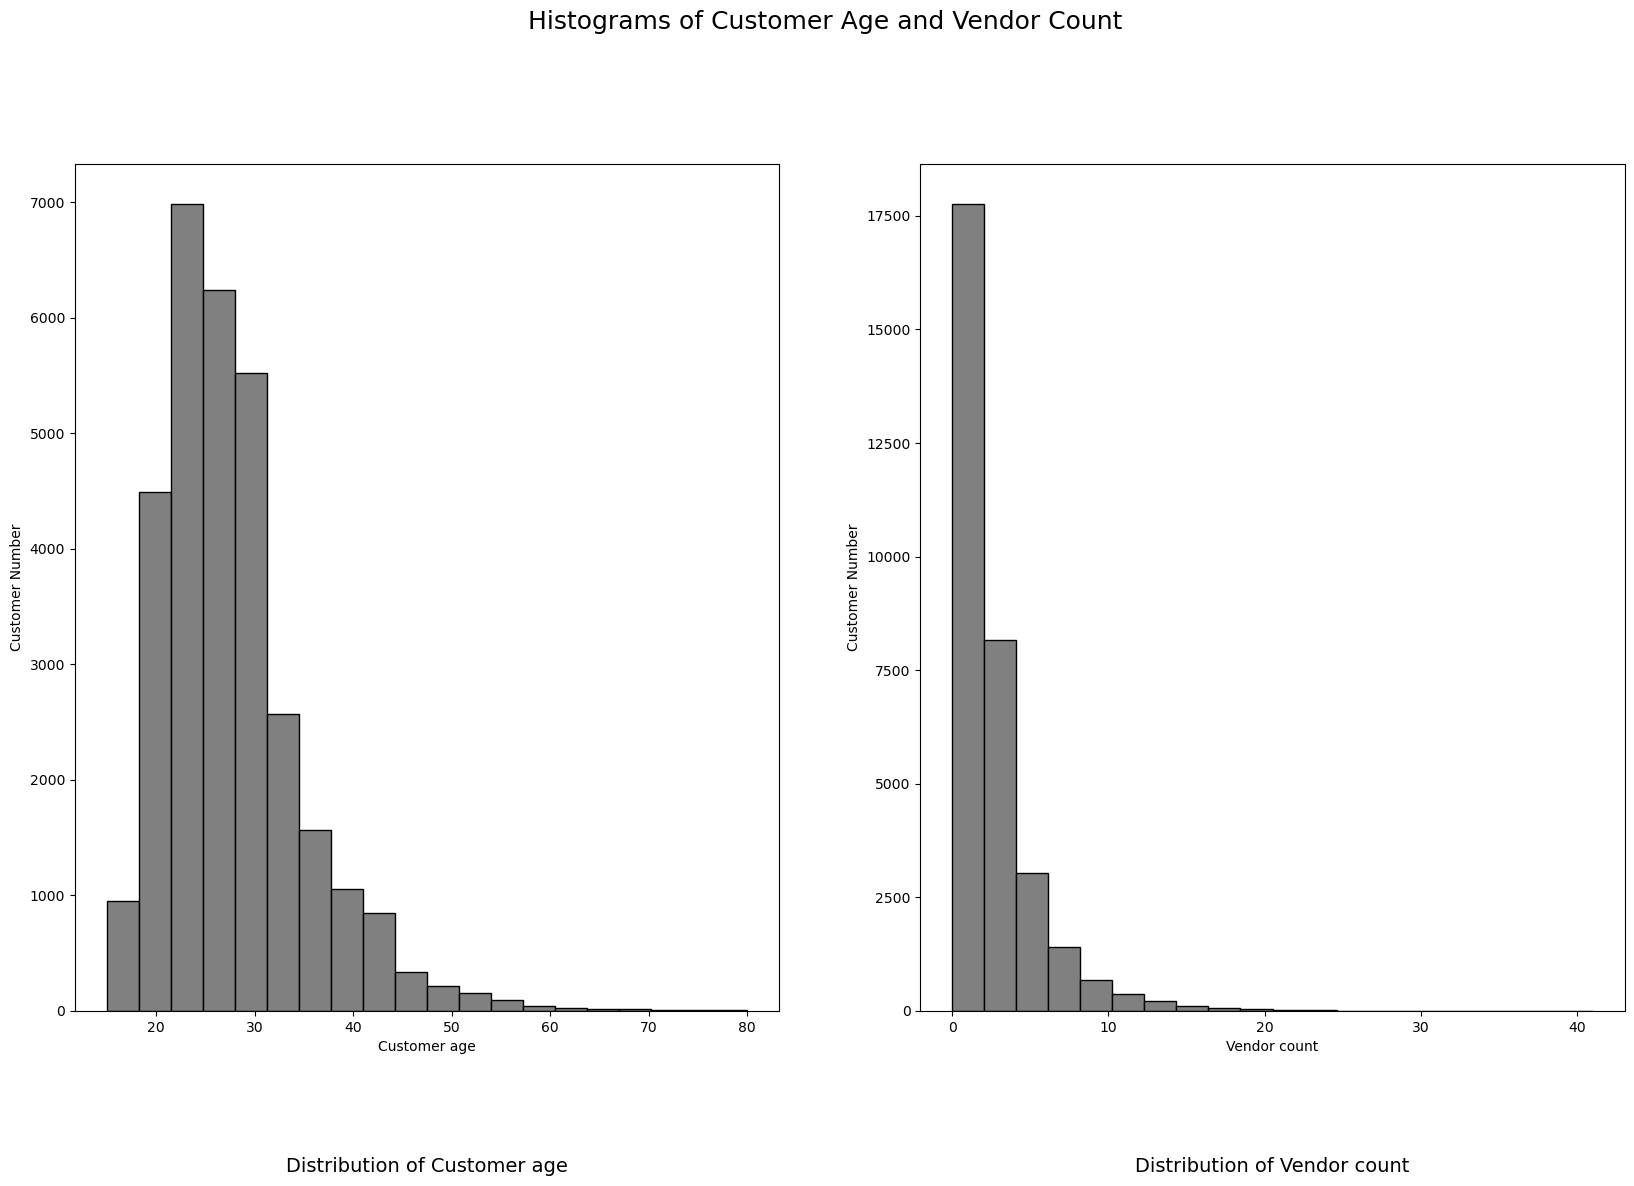

In [10]:
sp_rows = 1
sp_cols = 2

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Iterate over each axis and feature to plot histograms
for ax, feature in zip(axes.flatten(), ['customer_age', 'vendor_count']):
    ax.hist(df_copy[feature].dropna(), bins=20, color='grey', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.2)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Customer Number")

plt.suptitle("Histograms of Customer Age and Vendor Count", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.savefig(os.path.join(save_dir, 'customer_age_vendor_count_histograms.png'), dpi=200, bbox_inches='tight')

plt.show()

## Histograms: **Days as Customer**
This shows us how long the customers have stayed with our service in three months.

### Remarks
- It can be seen that most of the customers have stayed for less than 5 days.


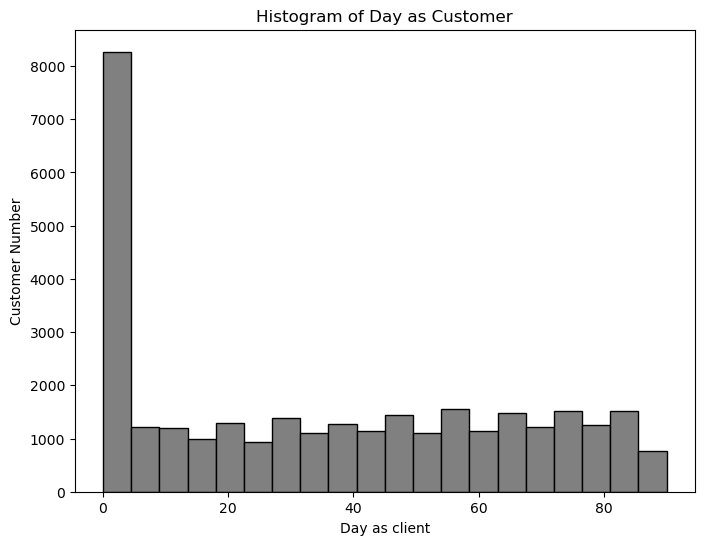

In [11]:
# Calculate the difference between "last_order" and "first_order"
df_copy['day_as_customer'] = df_copy['last_order'] - df_copy['first_order']

plt.figure(figsize=(8, 6))
plt.hist(df_copy['day_as_customer'], bins=20, color='gray', edgecolor='black')
plt.title('Histogram of Day as Customer')
plt.xlabel('Day as client')
plt.ylabel('Customer Number')
plt.show()

## Bar Chart: **Total Orders per Hour**

### Remarks
- It can be observed that high demand occurs from 10:00 to 12:00 and 16:00 to 18:00.

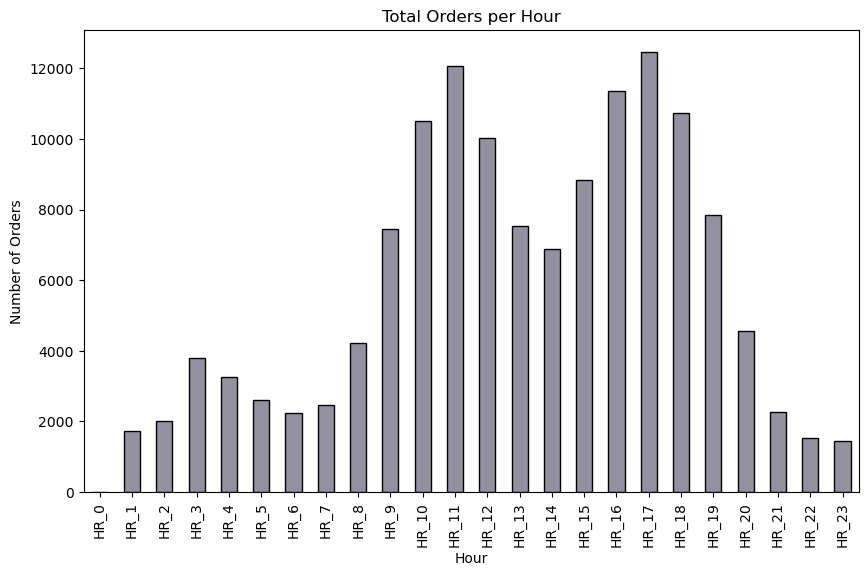

In [12]:
# Select the HR_ features
hour_columns = [f'HR_{i}' for i in range(24)]

# Calculate total orders for each hour by summing across all rows for each hour column
total_orders_per_hour = df_copy[hour_columns].sum()

# Create a bar plot to visualize total orders per hour in shades of grey
plt.figure(figsize=(10, 6))
total_orders_per_hour.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders per Hour') 
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

## Bar Chart: **Total Orders per Day of the Week**

### Remarks
- There is a peak in food orders on Thursdays (DOW_4) and Saturdays (DOW_6).

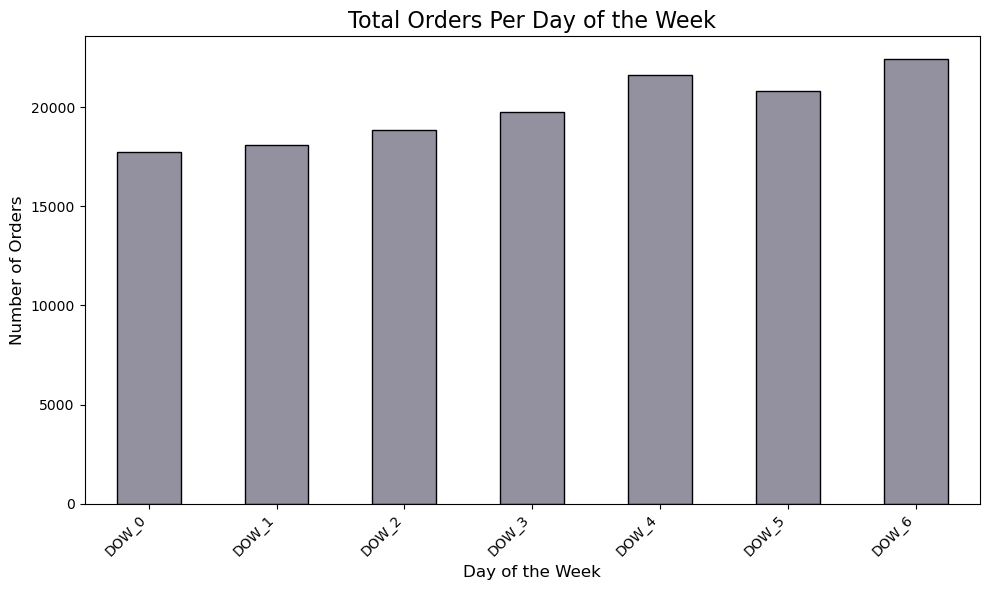

In [13]:
# Select columns for days of the week (DOW_0 to DOW_6)
dow_columns = [f'DOW_{i}' for i in range(7)]

# Calculate total orders for each day of the week by summing across all rows for each day column
total_orders_per_dow = df_copy[dow_columns].sum()

# Create a bar chart to visualize total orders per day of the week in grey scale
plt.figure(figsize=(10, 6))
total_orders_per_dow.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Day of the Week', fontsize=16) 
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

## Bar chart: **Total Orders per Cuisine**

### Remarks
- Asian, American and Street food / snacks can be considered as the most popular choices.

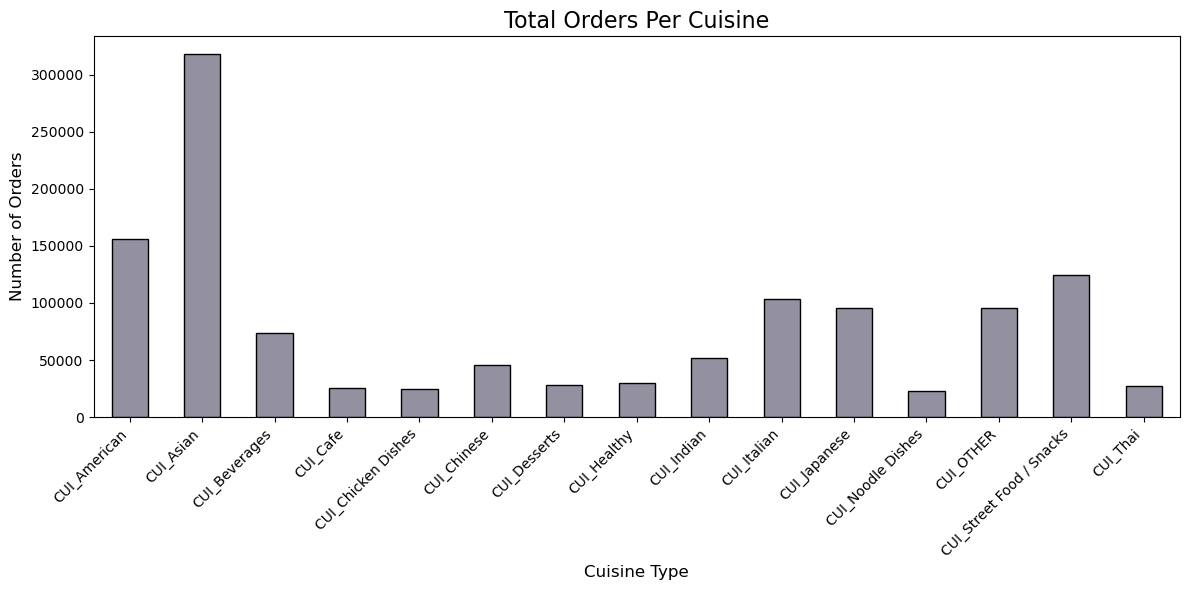

In [14]:
# Select CUI_ features
cuisine_columns = [col for col in df_copy.columns if 'CUI_' in col]

# Sum total number of orders per cuisine
df_copy['total_orders_per_cuisine'] = df_copy[cuisine_columns].sum(axis=1)

# Create a bar chart to visualize total orders per cuisine in grey scale
plt.figure(figsize=(12, 6))
df_copy[cuisine_columns].sum().plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Cuisine', fontsize=16) 
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## Bar Chart: **Average Purchases per Order by Cuisine**
### Remarks
- Customers who ordered CUI_cafe had the highest average purchase price, followed by CUI_Street Food / Snacks and CUI_Chinese.

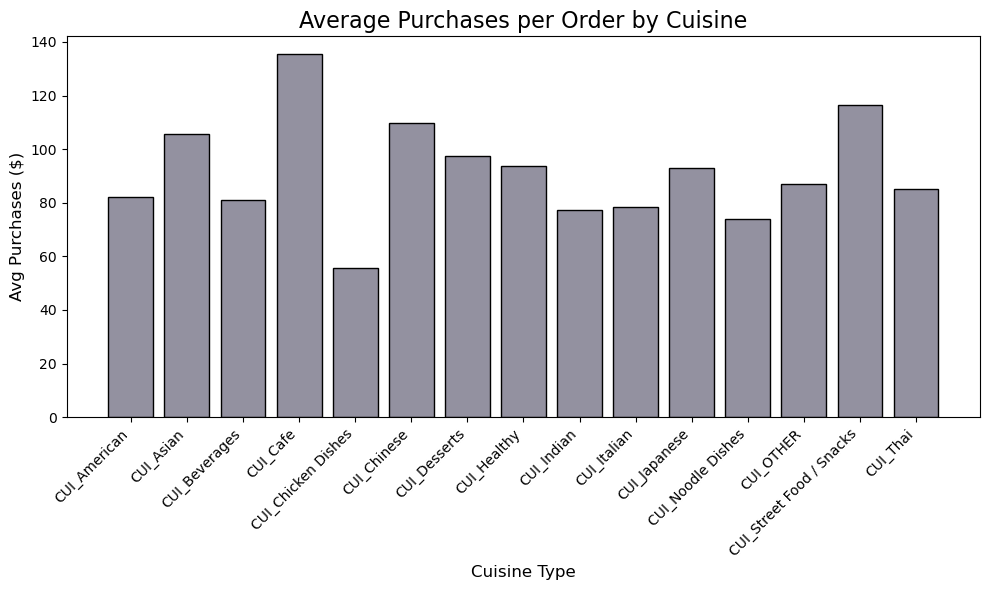

In [15]:
# Check if "total_revenue" exists; if not, create it by summing across cuisine columns
if 'total_revenue' not in df_copy.columns:
    # Calculate total revenue for each row
    df_copy['total_revenue'] = df_copy[cuisine_columns].sum(axis=1)  

# Calculate Avg_Purchases for each cuisine
# Multiply the number of purchases by total revenue, then sum and divide by total purchases for each cuisine
avg_purchases = (df_copy[cuisine_columns].multiply(df_copy['total_revenue'], axis=0)).sum() / df_copy[cuisine_columns].sum()

# Plot Avg_Purchases as a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(cuisine_columns, avg_purchases, color="#9391A0", edgecolor='black')  

plt.title('Average Purchases per Order by Cuisine', fontsize=16)  
plt.xlabel('Cuisine Type', fontsize=12)  
plt.ylabel('Avg Purchases ($)', fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  

## Bar Chart: **Total Orders by Customer Region**
### Remarks
- The most orders were placed in 8670 regions, followed by 4660 and 2360 regions.
- There should be 3 cities instead of 9 regions in the dataset. It seems like these cities are: City A where the number begins with "2", City B where the number begins with "4", City C where the number begins with "8".
- The missing value "-" not a large number.

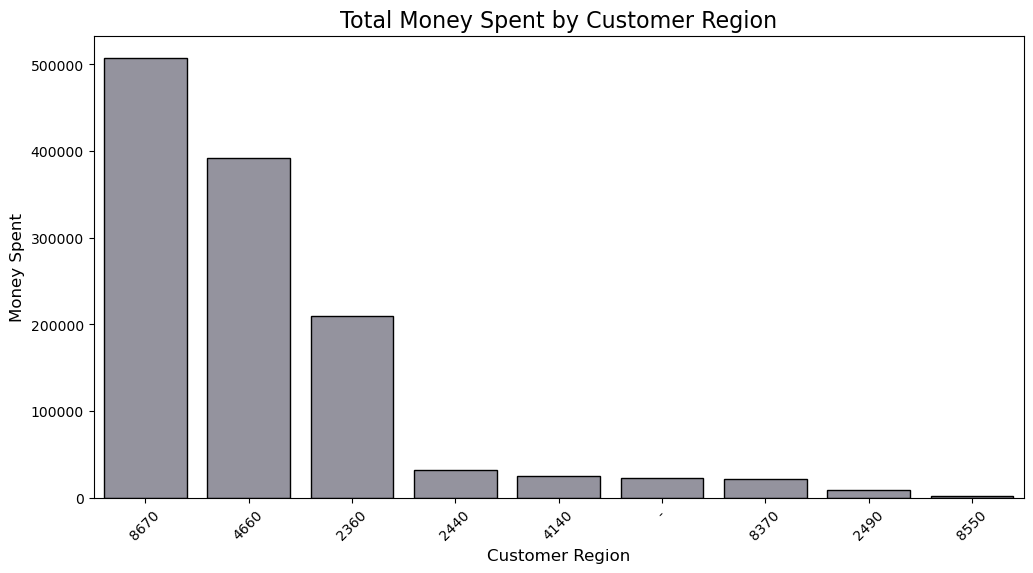

In [16]:
# Calculate total orders by summing across all cuisine columns
df_copy['money_spent'] = df_copy[cuisine_columns].sum(axis=1)

# Group data by customer region and calculate total orders for each region
region_orders = df_copy.groupby('customer_region')['money_spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))  
sns.barplot(x=region_orders.index, y=region_orders.values, color='#9391A0', edgecolor='black')  
plt.title('Total Money Spent by Customer Region', fontsize=16)  
plt.xlabel('Customer Region', fontsize=12)  
plt.ylabel('Money Spent', fontsize=12)  
plt.xticks(rotation=45) 
plt.show()  

## Bar Chart: **Total Orders by Customer Region and Cuisine Type**
- In regions beginning with "8", **CUI_Asian** is the most popular, followed by CUI_Street Food / Snack and CUI_American. 
- In regions beginning with "4", **CUI_Italian** is the most popular, followed by CUI_American and CUI_Asian. 
- In regions beginning with "2", **CUI_Asian** and **American** are the most popular, followed by CUI_Italian. 
- The missing value “-” has the same distribution as the regions starting with the number “8”.

### Popular Cuisines
We defined "CUI_Asian", "CUI_American", "CUI_Italian", and "CUI_Street Food / Snacks" as popular cuisines referring to total_orders_per_cuisine histogram.

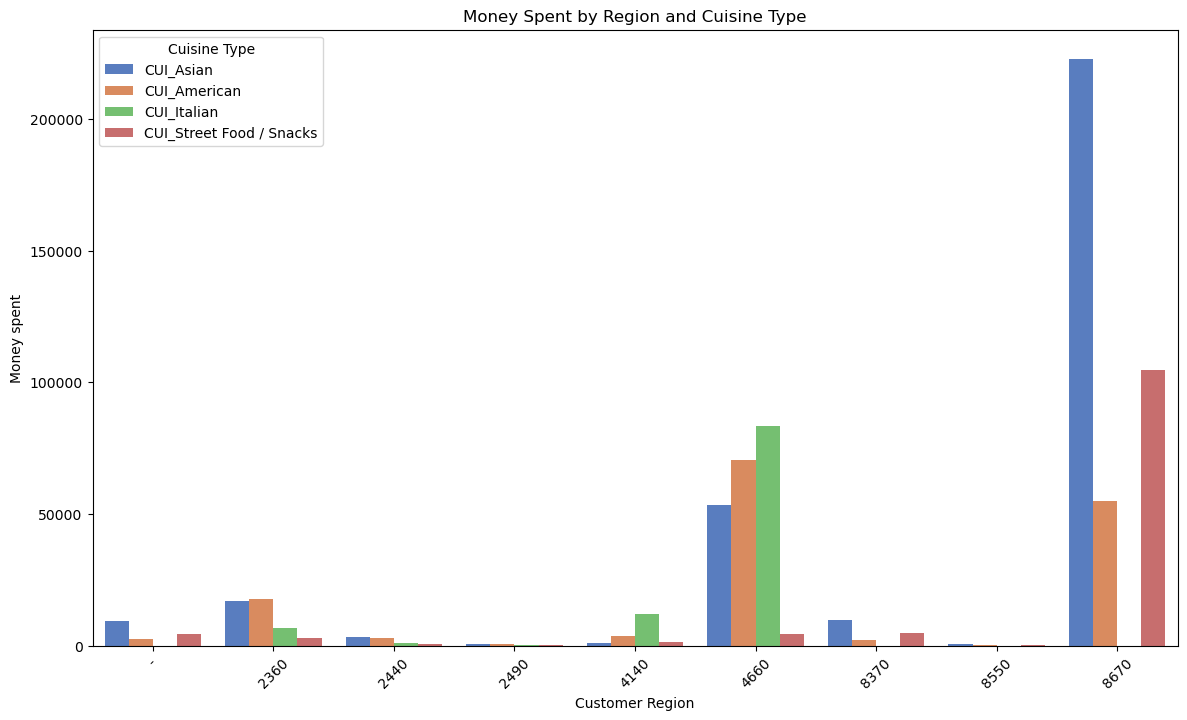

In [17]:
cuisine_columns_more_popular = ['CUI_Asian', 'CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks']
money_spent_by_region = df_copy.groupby('customer_region')[cuisine_columns_more_popular].sum()

# Reset the index for plotting
money_spent_by_region = money_spent_by_region.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
money_spent_by_region_melted = money_spent_by_region.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns_more_popular, 
                                                          var_name='Cuisine', 
                                                          value_name='money_spent')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=money_spent_by_region_melted, x='customer_region', y='money_spent', hue='Cuisine', palette="muted")
plt.title('Money Spent by Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Money spent')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()


### Less Popular Cuisines

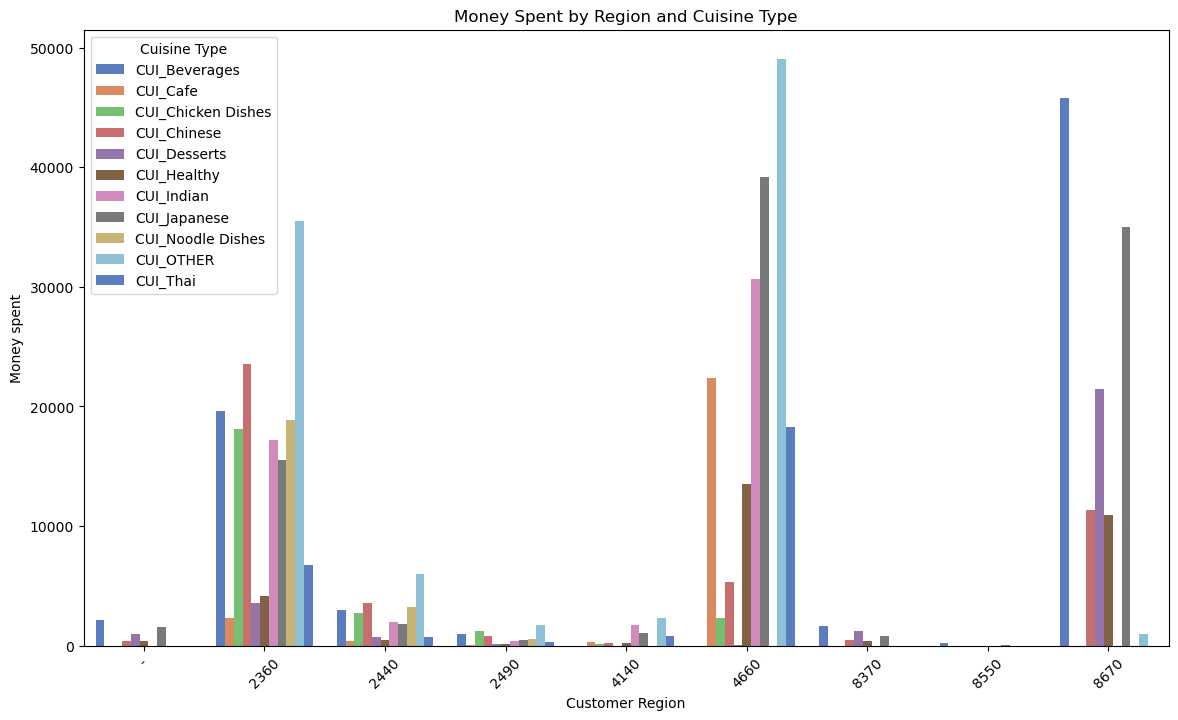

In [18]:
cuisine_columns_less_popular = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Thai']
money_spent_by_region = df_copy.groupby('customer_region')[cuisine_columns_less_popular].sum()

# Reset the index for plotting
money_spent_by_region = money_spent_by_region.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
money_spent_by_region_melted = money_spent_by_region.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns_less_popular, 
                                                          var_name='Cuisine', 
                                                          value_name='money_spent')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=money_spent_by_region_melted, x='customer_region', y='money_spent', hue='Cuisine', palette="muted")
plt.title('Money Spent by Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Money spent')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()


<a class="anchor" id="6">     

# 3. Key Statisctics and Trend
</a>    

## Remarks from first delivery

### Key Statistics
- **Customer Age**: The mean of 'customer_age' is 27.5. 25% of the customers are 23 or younger, and 75% are 32 or younger. Thus, it can be concluded that young people tend to use our food delivery service.
- **Vender Number**: The mean of 'vendor_count' is 3.1. 25% of the customers have ordered from 1 vendor, 50% have ordered from 2 vendors, and 75% have ordered from 4 vendors. Thus, it can be concluded that most of the customers have ordered from less than 4 vendors in 3 months.
- **Product Number**: The mean of 'product_count' is 5.67. 25% of the customers have ordered 2 products, 50% have ordered 3 products, and 75% have ordered 7 products in 3 months. There is a high standard deviation of 6.96, reflecting significant variability in order volume.
- **Payment Methods**: Most customers pay by card rather than by cash or digital.
- **Order Numbers per Regions**: The region with the highest number of orders was 8670, followed by 4660 and 2360, far ahead of the other regions. The region 8670 had the highest number of unique customers who placed orders, followed by 4660 and 2360.

### Key Decisions
- **Chain Restaurant Number**: Agree with metadata and disagree with the dataset. The values should be converted to boolean in the next process.
- **Date of First Order and Last Order**: We decided to creat new feature *days_as_customer*.
- **Customer Region**: There are 8 different regions. There should be 3 cities instead, so it seems like they are postal codes. Then we can categorize them into 3 groups (cities): city A (2360, 2440 and 2490), city B (4660 and 4140), and city C (8670, 8370 and 8550) in the next process.

### Trends
- **Young Customers**: The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 18 and 32.
- **Payment by Card**: Most customers pay by card rather than by cash or digital.
- **Popular Cuisine**: American and Asian dishes emerge as the most popular choices.
- **Popular Cuisine per Regions**: Asian cuisine is the most popular in region 8670, while Italian cuisine leads in region 4660. This trend is consistent across other city regions, though with significant variation in total order volumes. In region 4140, however, the popularity of these cuisines is less pronounced compared to the two largest regions. City A shows greater diversity in cuisine preferences than the other two cities.
- **Busier Day of The Week**: Peak food ordering on Thursdays (DOW_4) and Saturdays (DOW_6).
- **Busier Hours**: High demand occurs from 10:00 AM to 12:00 PM and 4:00 PM to 6:00 PM.
- **Customer Frequency**: Most of the customers stay for two to three days, this short engagement period suggests that customers may use the service sporadically rather than consistently over extended periods.

<a class="anchor" id="7">     

# 4. Data Pre-Processing 1
</a>    

<a class="anchor" id="8">     

## 4.1. Treating Missing Values
</a>    

## Remarks from first delivery
[Missing values]
- ***customer_age***: 727 (NaN)
- ***first_order***: 106 (NaN)
- ***HR_0***: 1165 (NaN)
- ***customer_region***: 442 (-)
- ***last_promo***: 16748 (-) --> <font color='red'>Exaggerated number of missing values</font>

In [19]:
# Check the figure of the dataset
df.shape

(31888, 56)

In [20]:
# Count both NaN and '-' as missing values
missing_values = df.isnull().sum() + df.isin(['-']).sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary of missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print("\nMissing Data Summary:")
missing_summary[missing_summary['Missing Values'] > 0]


Missing Data Summary:


,Missing Values,Percentage (%)
last_promo,16748,52.521325
HR_0,1165,3.653412
customer_age,727,2.279854
customer_region,442,1.386101
first_order,106,0.332413


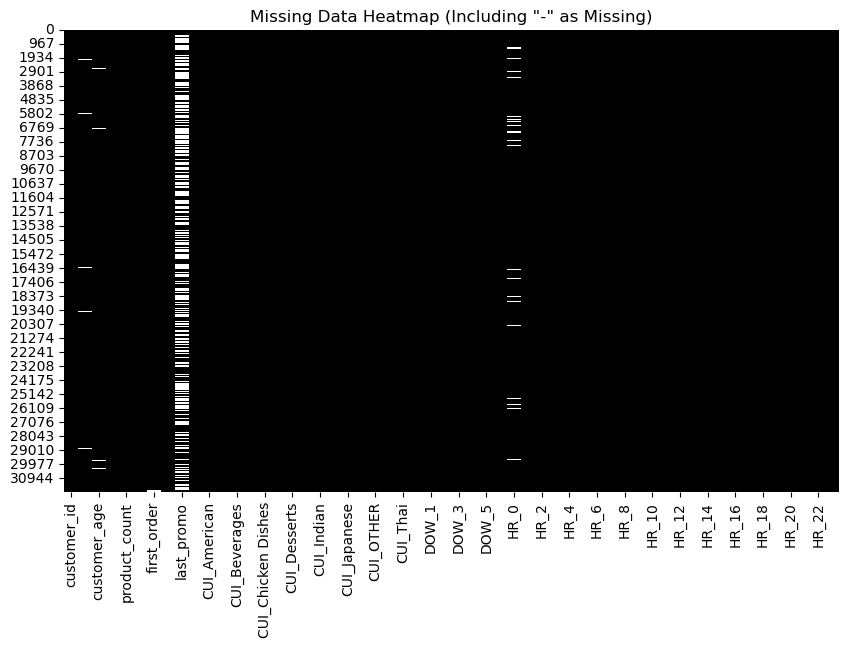

In [21]:
# Create a temporary copy of the dataset for visualization
temp_df = df.copy()

# Replace '-' with NaN for visualization purposes
temp_df.replace('-', np.nan, inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(temp_df.isnull(), cbar=False, cmap='CMRmap')
plt.title('Missing Data Heatmap (Including "-" as Missing)')
plt.show()

We have decided to fill missing values in the feature: 
- ***customer_age***: with its median because the data is skewed.
- ***first_order***: with its median because the data is skewed.
- ***HR_0*** with 0 because it is the only value it has.
- ***customer_region*** with 8000. From the visualization, "-" seems like to be able to be considered as City C (starting with 8000). Thus, we can fill the missing value "-" with "8000" for now since we will merge it with "8670", "8370" and "8550".
- ***last_promo***: with "Unknown" for now. We might frop the feature itself later.

In [22]:
print("\nMissing Values Before Cleaning:")
print(temp_df.isnull().sum().sum())


Missing Values Before Cleaning:
19188


In [23]:
# Check customer_region
df["customer_region"].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [24]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [25]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

In [26]:
# Fill missing values in customer age with its median
df["customer_age"] = df["customer_age"].fillna(df["customer_age"].median())

# Fill missing values in first_order with its median
df["first_order"] = df["first_order"].fillna(df["first_order"].median())

# Fill missing values in HR_0 with 0
df["HR_0"] = df["HR_0"].fillna(df["HR_0"].fillna(0))

# Fill missing values "-" in customer_region with 8000
df["customer_region"] = df["customer_region"].replace("-", '8000')

# Fill missing values "-" in last_prom with UNKNOWN
df["last_promo"] = df["last_promo"].replace("-", "UNKNOWN")

In [27]:
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
8000     442
8550      26
Name: count, dtype: int64

In [28]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())


Missing Values After Cleaning:
0


<a class="anchor" id="9">     

## 4.2. Changing Data Types
</a>    

## Remarks
- ***customer_age*** should be integer instead of float.
- ***is_chain*** should be boolean instead of integer because we agreed with METADATA.
- ***first_order*** should be integer instead of float.
- ***HR_0*** should be integer instead of float.

In [29]:
df["customer_age"] = df["customer_age"].astype("int")

df["first_order"] = df["first_order"].astype("int")

df["HR_0"] = df["HR_0"].astype("int")

We agree with Metadata and disagree with the dataset about *is_chain*. We decided to convert it into boolean. If the value = 0, that means False, True otherwise.

In [30]:
df["is_chain"].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80])

In [31]:
df["is_chain"] = df["is_chain"].astype("bool")

#Replace True with 1 and False with 0
df["is_chain"] = df["is_chain"].apply(lambda x: True if x else False)

In [32]:
# Check dataset if all dtypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31888 non-null  int64  
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  bool   
 6   first_order               31888 non-null  int64  
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<a class="anchor" id="10">     

## 4.3. Dropping Duplicates
</a>    

We are going to check if there are duplicates in the dataset.

In [33]:
# Check if there are duplicates in the dataset
df.duplicated().sum()

13

There are 13 duplicates. Since it is a small number, we decided to drop them.

In [34]:
# Drop duplicates in the dataset
df.drop_duplicates(inplace=True)

In [35]:
# Check if all duplicates are dropped
df.duplicated().sum()

0

<a class="anchor" id="11">     

## 4.4. Dropping Customers with No Order
</a>    

We are going to check if there are customers who have not ordered anything.

In [36]:
df.shape

(31875, 56)

In [37]:
# List of columns to sum
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Create new feature 'total_order' 
df['total_orders'] = df[columns_to_sum].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,total_orders
0,1b8f824d5e,2360,18,2,5,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
1,5d272b9dcb,8670,17,2,2,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2
2,f6d1b2ba63,4660,38,1,2,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [38]:
clients_with_zero_orders = df[df['total_orders'] == 0]

In [39]:
clients_with_zero_orders.count()

customer_id                 138
customer_region             138
customer_age                138
vendor_count                138
product_count               138
is_chain                    138
first_order                 138
last_order                  138
last_promo                  138
payment_method              138
CUI_American                138
CUI_Asian                   138
CUI_Beverages               138
CUI_Cafe                    138
CUI_Chicken Dishes          138
CUI_Chinese                 138
CUI_Desserts                138
CUI_Healthy                 138
CUI_Indian                  138
CUI_Italian                 138
CUI_Japanese                138
CUI_Noodle Dishes           138
CUI_OTHER                   138
CUI_Street Food / Snacks    138
CUI_Thai                    138
DOW_0                       138
DOW_1                       138
DOW_2                       138
DOW_3                       138
DOW_4                       138
DOW_5                       138
DOW_6   

We found out that there are 138 customers who have not ordered anything in the dataset. Since it is not a large number, we have decided to drop them from the dataset.

In [40]:
df.drop(df[df['total_orders'] == 0].index, inplace=True)

In [41]:
# Check if the change was applied correctly
df['total_orders'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1, 29, 51, 53, 65, 45, 91, 50, 75, 49,
       48, 80, 59])

In [42]:
# Drop 'total_orders'
df.drop('total_orders', axis=1, inplace=True)

# Check if the change was applied correctly
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18,2,5,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17,2,2,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38,1,2,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df.shape

(31737, 56)

<a class="anchor" id="12">     

# 5. Outliers Treatment
</a>    

To define the outliers, we are going to create box plots of numerical features.

In [44]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31737 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31737 non-null  object 
 1   customer_region           31737 non-null  object 
 2   customer_age              31737 non-null  int64  
 3   vendor_count              31737 non-null  int64  
 4   product_count             31737 non-null  int64  
 5   is_chain                  31737 non-null  bool   
 6   first_order               31737 non-null  int64  
 7   last_order                31737 non-null  int64  
 8   last_promo                31737 non-null  object 
 9   payment_method            31737 non-null  object 
 10  CUI_American              31737 non-null  float64
 11  CUI_Asian                 31737 non-null  float64
 12  CUI_Beverages             31737 non-null  float64
 13  CUI_Cafe                  31737 non-null  float64
 14  CUI_Chicken

### Box plots for numerical features

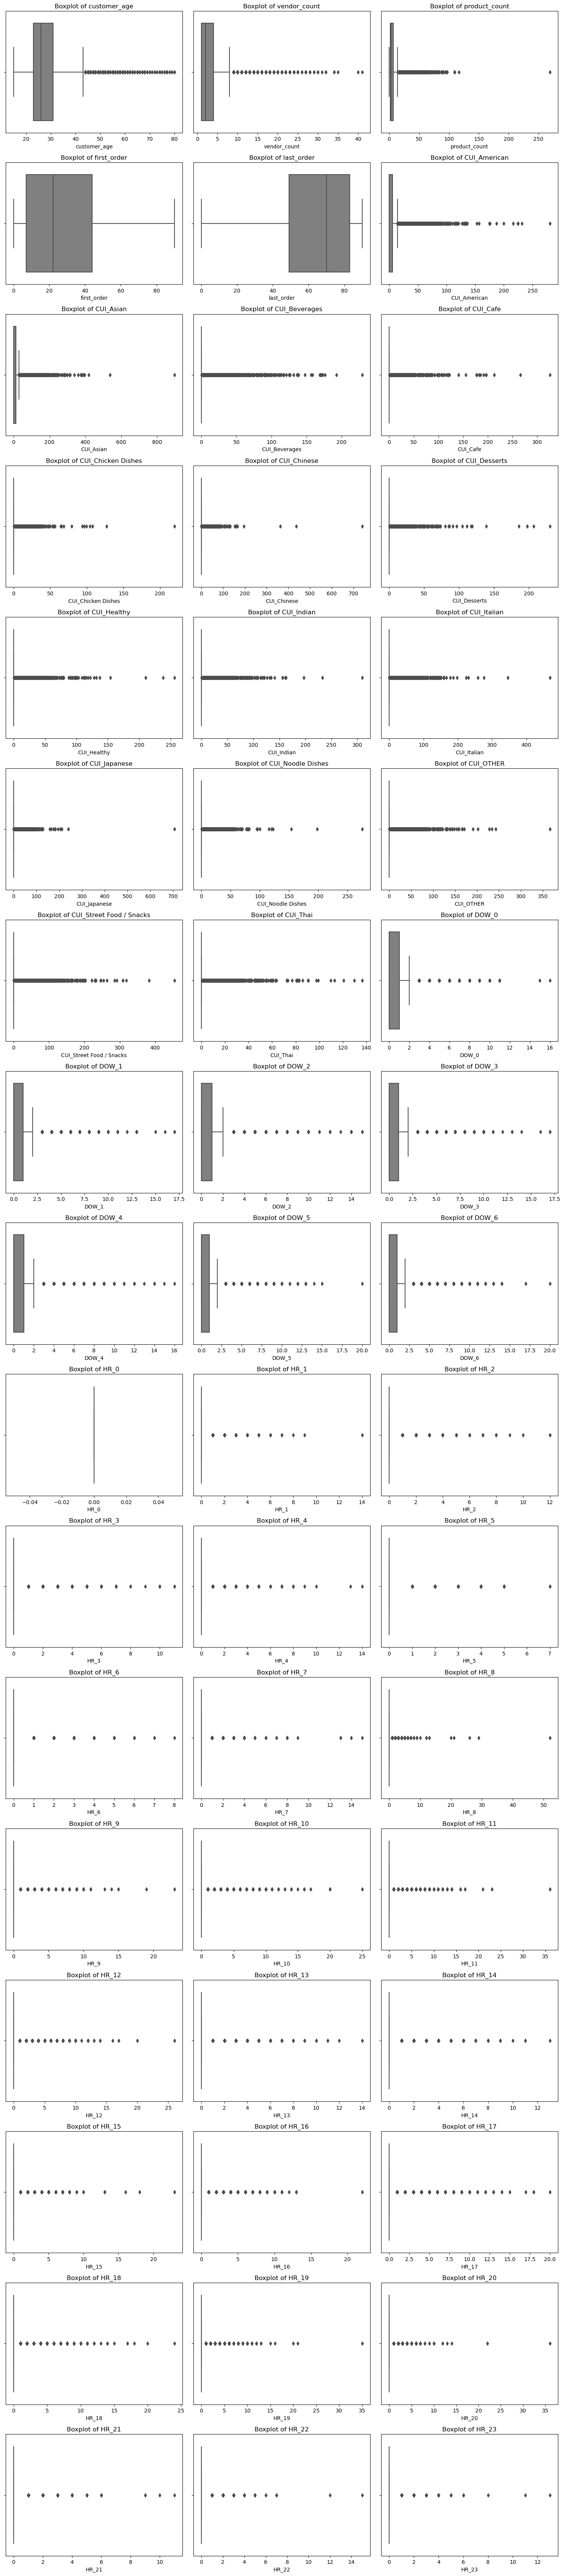

In [45]:
# Make a variable of numerical features
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Plot boxplots 
def plot_boxplots_grid(df, columns, cols=3):
    rows = int(np.ceil(len(columns) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i], color='grey')
        axes[i].set_title(f'Boxplot of {column}')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots_grid(df, numeric_columns)

## Observations

- After analyzing the boxplots of the numerical features, we noticed that there are no extreme values on the left side (lower bound) of the box plots, meaning that the majority of them are in the right side (upper bound) of the box plots.
- With that in mind, we decided to go with the rule of thumb in data analysis of choosing the 99th percentile as a threshold for handling outliers.

We decided to treat outliers of only three features *customer_age*, *vendor_count*, and *product_count*, because we believed it was better to leave outliers in the remaining features for better segmentation of customers.<br>
We are going to check the difference between the max value and 99th percentile of the features: *customer_age*, *vendor_count*, and *product_count*.

In [46]:
# Create a variable of three features that we are going to treat
columns_to_check = ['customer_age', 'vendor_count', 'product_count']

percentile_threshold = 0.99
# Define 99th percentile as threshould
thresholds = {col: df[col].quantile(percentile_threshold) for col in columns_to_check}

# Compare the max value and 99th percentile in the features
for col in columns_to_check:
    max_value = df[col].max()
    threshold = thresholds[col]
    print(f"{col}: Max = {max_value}, 99th Percentile = {threshold}")

customer_age: Max = 80, 99th Percentile = 52.0
vendor_count: Max = 41, 99th Percentile = 14.0
product_count: Max = 269, 99th Percentile = 34.0


**As you can see here, just from looking at the 99th percentile compared to the max value from the features, we can confirm our theory that the last 1th percentile contains a significant amount of outliers.**

We decided to convert the outliers of these three features to the 99th percentile of each feature.

In [47]:
# Treat outliers of these three features
for col in columns_to_check:
    upper_limit = thresholds[col]
    # If a value in the column is greater than 99th percentile, replace it with 99th percentile
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

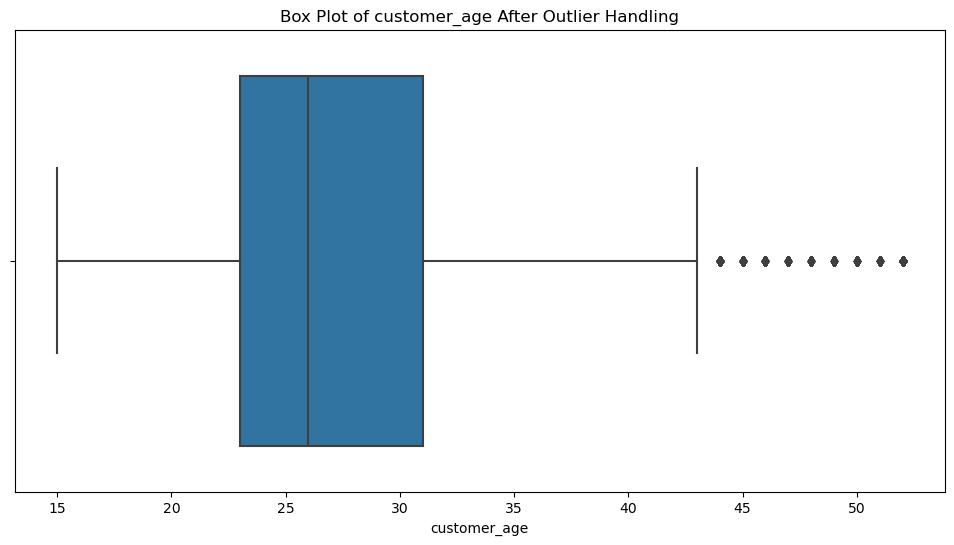

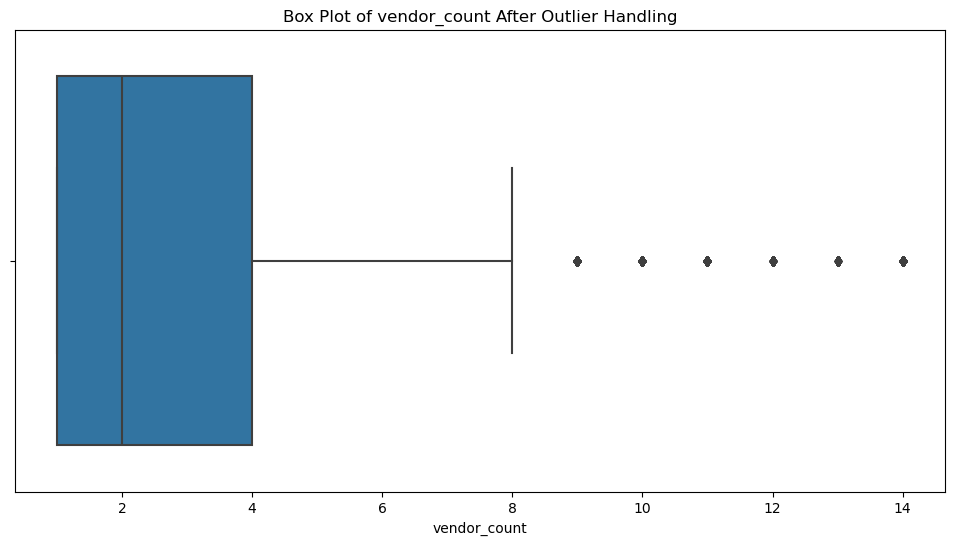

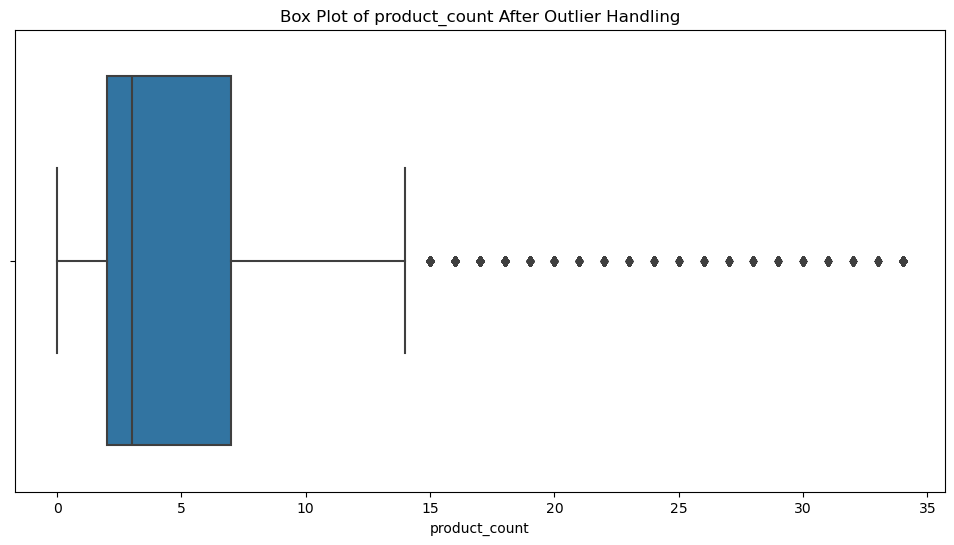

In [48]:
# Create box plots to check if the changes were applied correctly
for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f"Box Plot of {col} After Outlier Handling")
    plt.show()

<a class="anchor" id="13">     

# 6. New Feature Creation
</a>

<a class="anchor" id="14">     

## 6.1. days_as_customer
</a>


We are going to create new feature *days_as_customer* that provides us how long each customer has used our services over a three-month period.

In [49]:
# Calculate the days the customer has used our service
df['days_as_customer'] = df['last_order'] - df['first_order']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


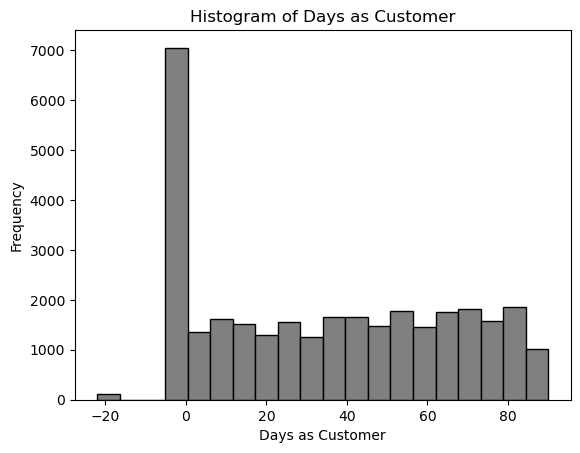

In [50]:
# Plot histogram
plt.hist(df['days_as_customer'], bins=20, color='grey', edgecolor='black')
plt.title('Histogram of Days as Customer')
plt.xlabel('Days as Customer')
plt.ylabel('Frequency')
plt.show()

In [51]:
Negative_days_counts = df[df['days_as_customer'] < 0]['days_as_customer'].value_counts()
print(Negative_days_counts)

days_as_customer
-22    106
Name: count, dtype: int64


After viewing the output of this new feature, we realized that there are 106 customers that had a negative value -22 for the *days_as_customers* which is not acceptable. The reasoning we hypothosized is those 106 customers had *first_order* of NaN and *last_order* less than the median of the *first_order* before treating the outliers. Therefore, to make sure the data is consistant and without errors, we decided to remove them from our dataset since their number is not big.

In [52]:
# Check the rows that have negative days in 'days_as_customer'
negative_days_rows = df[df['days_as_customer'] < 0]
negative_days_rows

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer
31782,0366fbb035,8670,24.0,1.0,1.0,False,22,0,UNKNOWN,DIGI,0.00,11.87,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22
31783,039d7c8a20,4660,23.0,1.0,1.0,False,22,0,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,14.49,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-22
31784,04c9d25c93,8670,27.0,1.0,1.0,True,22,0,DISCOUNT,CASH,18.16,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22
31785,09118ae9e7,8670,36.0,1.0,1.0,False,22,0,UNKNOWN,CARD,0.00,6.02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-22
31786,0d1f298bbd,4660,22.0,1.0,1.0,True,22,0,DISCOUNT,CASH,5.22,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-22
31787,0e61c6c970,4660,30.0,1.0,1.0,False,22,0,DELIVERY,CARD,0.00,11.93,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-22
31788,12faabe829,8670,46.0,1.0,2.0,False,22,0,UNKNOWN,CARD,0.00,30.60,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22
31789,14dd83cc53,2360,33.0,1.0,1.0,True,22,0,DELIVERY,CASH,0.00,0.00,0.00,0.0,7.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-22
31790,1529108175,4660,28.0,1.0,2.0,True,22,0,DISCOUNT,CARD,13.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-22
31791,167a9522d7,8670,29.0,1.0,1.0,False,22,0,DELIVERY,CASH,0.00,6.56,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-22


In [53]:
df.shape

(31737, 57)

In [54]:
# Identify rows where 'days_as_client' is negative
negative_days = df[df['days_as_customer'] < 0].index

# Drop rows with inplace=True
df.drop(index=negative_days, inplace=True)

In [55]:
# Check if the change was applied correctly
df.shape

(31631, 57)

<a class="anchor" id="15">     

## 6.2. money_spent 
</a>

We are going to create new feature *money_spent* that provides us the total amount spent by each customer.

In [56]:
# List of all cuisine columns, including the combined CUI_OTHER
cuisine_columns = [col for col in df.columns if 'CUI_' in col]  

# Creat new feature 'money_spent' 
df['money_spent'] = df[cuisine_columns].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20


<a class="anchor" id="16">

## 6.3. customer_city
</a>

As mentioned in the previous steps, we found that are there eight regions instead of three cities. Therefore, we decided to group regions 2360, 2440, and 2490 as city A, regions 4660 and 4140 as city B, and regions 8000, 8670, 8370, and 8550 as city C and create a new feature customer_city. This is because regions starting with the same number are considered the same city, since their distribution is the same as that observed in the data visualization.

In [57]:
# Define a mapping for the regions with string keys
region_to_city = {
    '2360': 'City A', '2440': 'City A', '2490': 'City A',
    '4660': 'City B', '4140': 'City B',
    '8670': 'City C', '8370': 'City C', '8550': 'City C','8000':'City C'
}

# Create new feature 'customer_city'
df['customer_city'] = df['customer_region'].map(region_to_city)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B


In [58]:
# Check the values of new feature
df['customer_city'].value_counts()

customer_city
City A    10729
City C    10522
City B    10380
Name: count, dtype: int64

<a class="anchor" id="17">     

## 6.4. total_orders
</a>

We are going to create new feature *total_orders* that provides us the total number of orders made by each customer.

In [59]:
# List of DOW_ columns to sum
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Create new feature 'total_order' 
df['total_orders'] = df[columns_to_sum].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2


<a class="anchor" id="18">     

## 6.5. average_purchase
</a>

We are going to create new feature *average_purchase* that provides us the average purchase amount per order for each customer.

In [60]:
# Create new feature 'average_purchase'
df['average_purchase'] = df['money_spent'] / df['total_orders']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600


<a class="anchor" id="19">     

## 6.6. age_group
</a>

We are going to create new feature *age_group* that provides the age group to which each customer belongs.<br>
We defined the age categories as follows:<br>
- Child: Below 17
- Young Adult: 18 - 34
- Adult: 35 - 59
- Senior: Above 60

In [61]:
# Define age categories
bins = [0, 18, 35, 60, float('inf')]  
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

# Create new feature 'age_group'
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult


<a class="anchor" id="20">     

## 6.7. morning_orders, afternoon_orders, evening_orders, night_orders
</a>

We are going to create four new features: *morning_orders*, *afternoon_orders*, *evening_orders*, and *night_orders* using *HR_* features that provide us which time of period each customer has ordered.<br>
We defined each features (groups) as follows: <br>
- morning_columns: HR_6, HR_7, HR_8, HR_9, HR_10, HR_11
- afternoon_columns: HR_12, HR_13, HR_14, HR_15, HR_16, HR_17
- evening_columns: HR_18, HR_19, HR_20, HR_21, HR_22, HR_23
- night_columns: HR_0, HR_1, HR_2, HR_3, HR_4, HR_5

In [62]:
# Define periods of the day
morning_columns = ['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11']
afternoon_columns = ['HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17']
evening_columns = ['HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
night_columns = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']

# Create new features 'morning_orders', 'afternoon_orders', 'evening_orders', and 'night_orders'
df['morning_orders'] = df[morning_columns].sum(axis=1)
df['afternoon_orders'] = df[afternoon_columns].sum(axis=1)
df['evening_orders'] = df[evening_columns].sum(axis=1)
df['night_orders'] = df[night_columns].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child,2,0,0,0
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult,2,0,0,0


<a class="anchor" id="21">     

## 6.8. customer_frequency
</a>

We are going to create new feature *customer_frequency* that provides us with a number of times (level) each customer has used our services.<br>
We used quantiles to decide each category as follows:<br>
- Infrequent: Under 25% (Q1)
- Moderate: Between 25% and 75% (Q1 to Q3)
- Frequent: Over 75% (Q3)


In [63]:
# Calculate the percentiles
q1 = df['total_orders'].quantile(0.25)
q3 = df['total_orders'].quantile(0.75)

# Define thresholds based on percentiles
df['customer_frequency'] = pd.cut(df['total_orders'], 
                             bins=[-float('inf'), q1, q3, float('inf')], 
                             labels=['Infrequent', 'Moderate', 'Frequent'])

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0,Infrequent
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child,2,0,0,0,Infrequent
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult,2,0,0,0,Infrequent


In [64]:
# Check the values in the new feature
df['customer_frequency'].value_counts()

customer_frequency
Infrequent    14016
Moderate      10477
Frequent       7138
Name: count, dtype: int64

In [65]:
Infrequent_counts = df[df['customer_frequency'] == 'Infrequent']['total_orders'].value_counts()
print(Infrequent_counts)

total_orders
2    7212
1    6804
Name: count, dtype: int64


In [66]:
Moderate_counts = df[df['customer_frequency'] == 'Moderate']['total_orders'].value_counts()
print(Moderate_counts)

total_orders
3    5097
4    3168
5    2212
Name: count, dtype: int64


In [67]:
frequent_counts = df[df['customer_frequency'] == 'Frequent']['total_orders'].value_counts()
print(frequent_counts)

total_orders
6     1492
7     1142
8      829
9      648
10     498
11     412
12     313
13     258
14     234
15     189
16     154
17     124
19      99
18      99
20      84
21      68
22      64
23      49
24      45
25      40
26      36
27      30
30      24
28      20
31      18
29      16
32      16
36      12
33      12
35       9
37       9
34       8
43       7
47       7
42       7
41       7
39       6
54       5
44       4
60       3
53       3
51       3
38       3
62       2
50       2
40       2
61       2
63       2
82       2
52       2
58       2
69       2
46       1
91       1
80       1
48       1
49       1
75       1
65       1
45       1
94       1
57       1
55       1
90       1
70       1
59       1
Name: count, dtype: int64


In [68]:
print(f"25th Percentile (Q1): {q1}")
print(f"75th Percentile (Q3): {q3}")

25th Percentile (Q1): 2.0
75th Percentile (Q3): 5.0


<a class="anchor" id="22">     

## 6.9. customer_preference
</a>


We are going to create new feature *customer_preference* that provides us the cuisine most ordered by each customer. We then assume that it is the dish that each customer prefers.

In [69]:
# Define all cuisine columns explicitly
cuisine_columns = [
    "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes",
    "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian",
    "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"
]

# Apply idxmax only to the cuisine columns
df['customer_preference'] = df[cuisine_columns].apply(lambda row: row.idxmax(), axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American


<a class="anchor" id="23">     

## 6.10. order_frequency
</a>


We are going to create new feature *order_frequency* that provide us the frequency of orders made by each customer over a 3 month period, by *total_orders* devided by 90 days.

In [70]:
df['order_frequency'] = df['total_orders'] / 90

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.022222
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,0.022222
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,0.022222


In [71]:
# Check the values of the new feature
df['order_frequency'].value_counts()

order_frequency
0.022222    7212
0.011111    6804
0.033333    5097
0.044444    3168
0.055556    2212
0.066667    1492
0.077778    1142
0.088889     829
0.100000     648
0.111111     498
0.122222     412
0.133333     313
0.144444     258
0.155556     234
0.166667     189
0.177778     154
0.188889     124
0.200000      99
0.211111      99
0.222222      84
0.233333      68
0.244444      64
0.255556      49
0.266667      45
0.277778      40
0.288889      36
0.300000      30
0.333333      24
0.311111      20
0.344444      18
0.322222      16
0.355556      16
0.400000      12
0.366667      12
0.411111       9
0.388889       9
0.377778       8
0.522222       7
0.477778       7
0.466667       7
0.455556       7
0.433333       6
0.600000       5
0.488889       4
0.422222       3
0.588889       3
0.566667       3
0.666667       3
0.644444       2
0.444444       2
0.555556       2
0.677778       2
0.688889       2
0.700000       2
0.911111       2
0.577778       2
0.766667       2
0.833333       

<a class="anchor" id="24">     

## 6.11. weekend_orders
</a>

We are going to create new feature *weekend_orders* that provides us the number of the orders that were made in the weekend days, DOW_6 (Saturday) and DOW_0 (Sunday).

In [72]:
# Assuming 'DOW_6' represents Saturday and 'DOW_0' represents Sunday
df['weekend_orders'] = df['DOW_6'] + df['DOW_0']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,weekend_orders
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.022222,2
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,0.022222,2
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,0.022222,2


In [73]:
# Check the values of the new feature
df['weekend_orders'].value_counts()

weekend_orders
0     12483
1      9909
2      4679
3      2038
4      1028
5       536
6       337
7       199
8       134
9        70
10       68
11       39
12       27
13       21
14       17
15       11
16        9
18        6
17        6
20        3
23        3
19        3
24        2
35        1
22        1
21        1
Name: count, dtype: int64

<a class="anchor" id="25">     

## 6.12. week_orders
</a>

We are going to create new feature *week_orders* that provides us the number of the orders that were made in the week days, from DOW_1 (Monday) to DOW_5 (Friday).

In [74]:
df['week_orders'] = df['DOW_1'] + df['DOW_2'] + df['DOW_3']+ df['DOW_4'] + df['DOW_5']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,weekend_orders,week_orders
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.022222,2,0
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,0.022222,2,0
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,0.022222,2,0


In [75]:
# Check the values in the new feature
df['week_orders'].value_counts()

week_orders
1     8939
2     7025
3     4205
0     2857
4     2473
5     1592
6     1093
7      766
8      586
9      419
10     322
11     252
12     199
13     147
14     136
16     106
15     100
18      66
17      52
19      47
21      36
20      35
23      22
22      22
25      14
26      13
24      11
29      10
28      10
33       9
27       9
34       6
41       5
31       5
43       4
40       4
30       4
36       3
42       3
32       2
44       2
46       2
38       2
49       2
37       2
67       2
35       2
59       1
62       1
45       1
54       1
65       1
52       1
51       1
57       1
Name: count, dtype: int64

<a class="anchor" id="26">     

## 6.13. Display New Features
</a>

In [76]:
# Create a variable of the new features
new_features = [
    'days_as_customer', 'money_spent', 'customer_city',
    'total_orders','average_purchase','age_group', 'morning_orders',
    'afternoon_orders', 'evening_orders', 'night_orders',
    'customer_frequency', 'customer_preference','order_frequency',
    'weekend_orders', 'week_orders'
    ]

# Show the first few rows of the new features
df[new_features].head(3)

,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,weekend_orders,week_orders
0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.022222,2,0
1,1,19.21,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,0.022222,2,0
2,1,9.20,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,0.022222,2,0


<a class="anchor" id="27">     

# 7. Data Pre-Processing 2
</a>   

<a class="anchor" id="28">     

## 7.1. Checking The Dataset
</a>   

In [77]:
df.shape

(31631, 71)

In [78]:
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,weekend_orders,week_orders
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.022222,2,0
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,0.022222,2,0
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,0.022222,2,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               31631 non-null  object  
 1   customer_region           31631 non-null  object  
 2   customer_age              31631 non-null  float64 
 3   vendor_count              31631 non-null  float64 
 4   product_count             31631 non-null  float64 
 5   is_chain                  31631 non-null  bool    
 6   first_order               31631 non-null  int64   
 7   last_order                31631 non-null  int64   
 8   last_promo                31631 non-null  object  
 9   payment_method            31631 non-null  object  
 10  CUI_American              31631 non-null  float64 
 11  CUI_Asian                 31631 non-null  float64 
 12  CUI_Beverages             31631 non-null  float64 
 13  CUI_Cafe                  31631 non-null  float64 


In [80]:
df.describe()

,customer_age,vendor_count,product_count,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,total_orders,average_purchase,morning_orders,afternoon_orders,evening_orders,night_orders,order_frequency,weekend_orders,week_orders
count,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.00000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.0,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000,31631.000000
mean,27.410420,3.081787,5.566470,28.399292,63.968702,4.906856,10.021647,2.312007,0.807672,0.773619,1.441461,0.889844,0.957150,1.642697,3.256743,3.01562,0.717118,3.021165,3.932211,0.847771,0.560210,0.571939,0.595492,0.624166,0.683096,0.657994,0.706427,0.0,0.054187,0.063577,0.119155,0.102431,0.082419,0.069995,0.077203,0.132844,0.235434,0.331984,0.380797,0.316272,0.238026,0.217129,0.278935,0.359110,0.393886,0.339635,0.247447,0.143941,0.071702,0.048655,0.045525,35.569410,38.543583,4.399323,10.294576,1.228257,1.803357,0.896905,0.421770,0.048881,1.266637,3.132686
std,6.810069,2.530556,5.890544,24.072935,22.924592,11.681515,23.635791,8.501467,6.452783,3.670749,8.222737,5.277784,5.852108,7.470987,11.288676,10.21591,4.554264,9.802817,15.595405,4.449941,1.016355,1.047015,1.048633,1.072286,1.090837,1.072376,1.170994,0.0,0.318128,0.352721,0.498873,0.439085,0.359863,0.330312,0.378671,0.637925,0.727399,0.894230,0.963191,0.845326,0.639537,0.600999,0.740627,0.877366,0.946858,0.897044,0.798161,0.588746,0.349851,0.299442,0.283069,29.386405,46.493581,5.092403,7.854131,2.265914,2.730438,1.927363,1.163604,0.056582,1.779082,3.773730
min,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370000,1.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000
25%,23.000000,1.000000,2.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,13.060000,2.000000,5.065000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,1.000000
50%,26.000000,2.000000,3.000000,22.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [81]:
df.describe(include = "object")

,customer_id,customer_region,last_promo,payment_method,customer_city,customer_preference
count,31631,31631,31631,31631,31631,31631
unique,31631,9,4,3,3,15
top,1b8f824d5e,8670,UNKNOWN,CARD,City A,CUI_Asian
freq,1,9576,16657,20055,10729,7000


In [82]:
df.isna().sum()

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

There is no missing values in the dataset.

<a class="anchor" id="29">     

## 7.2. Visualization of New Features 
</a>   

We are going to create the bar charts for categorical features and box plots for metric features.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


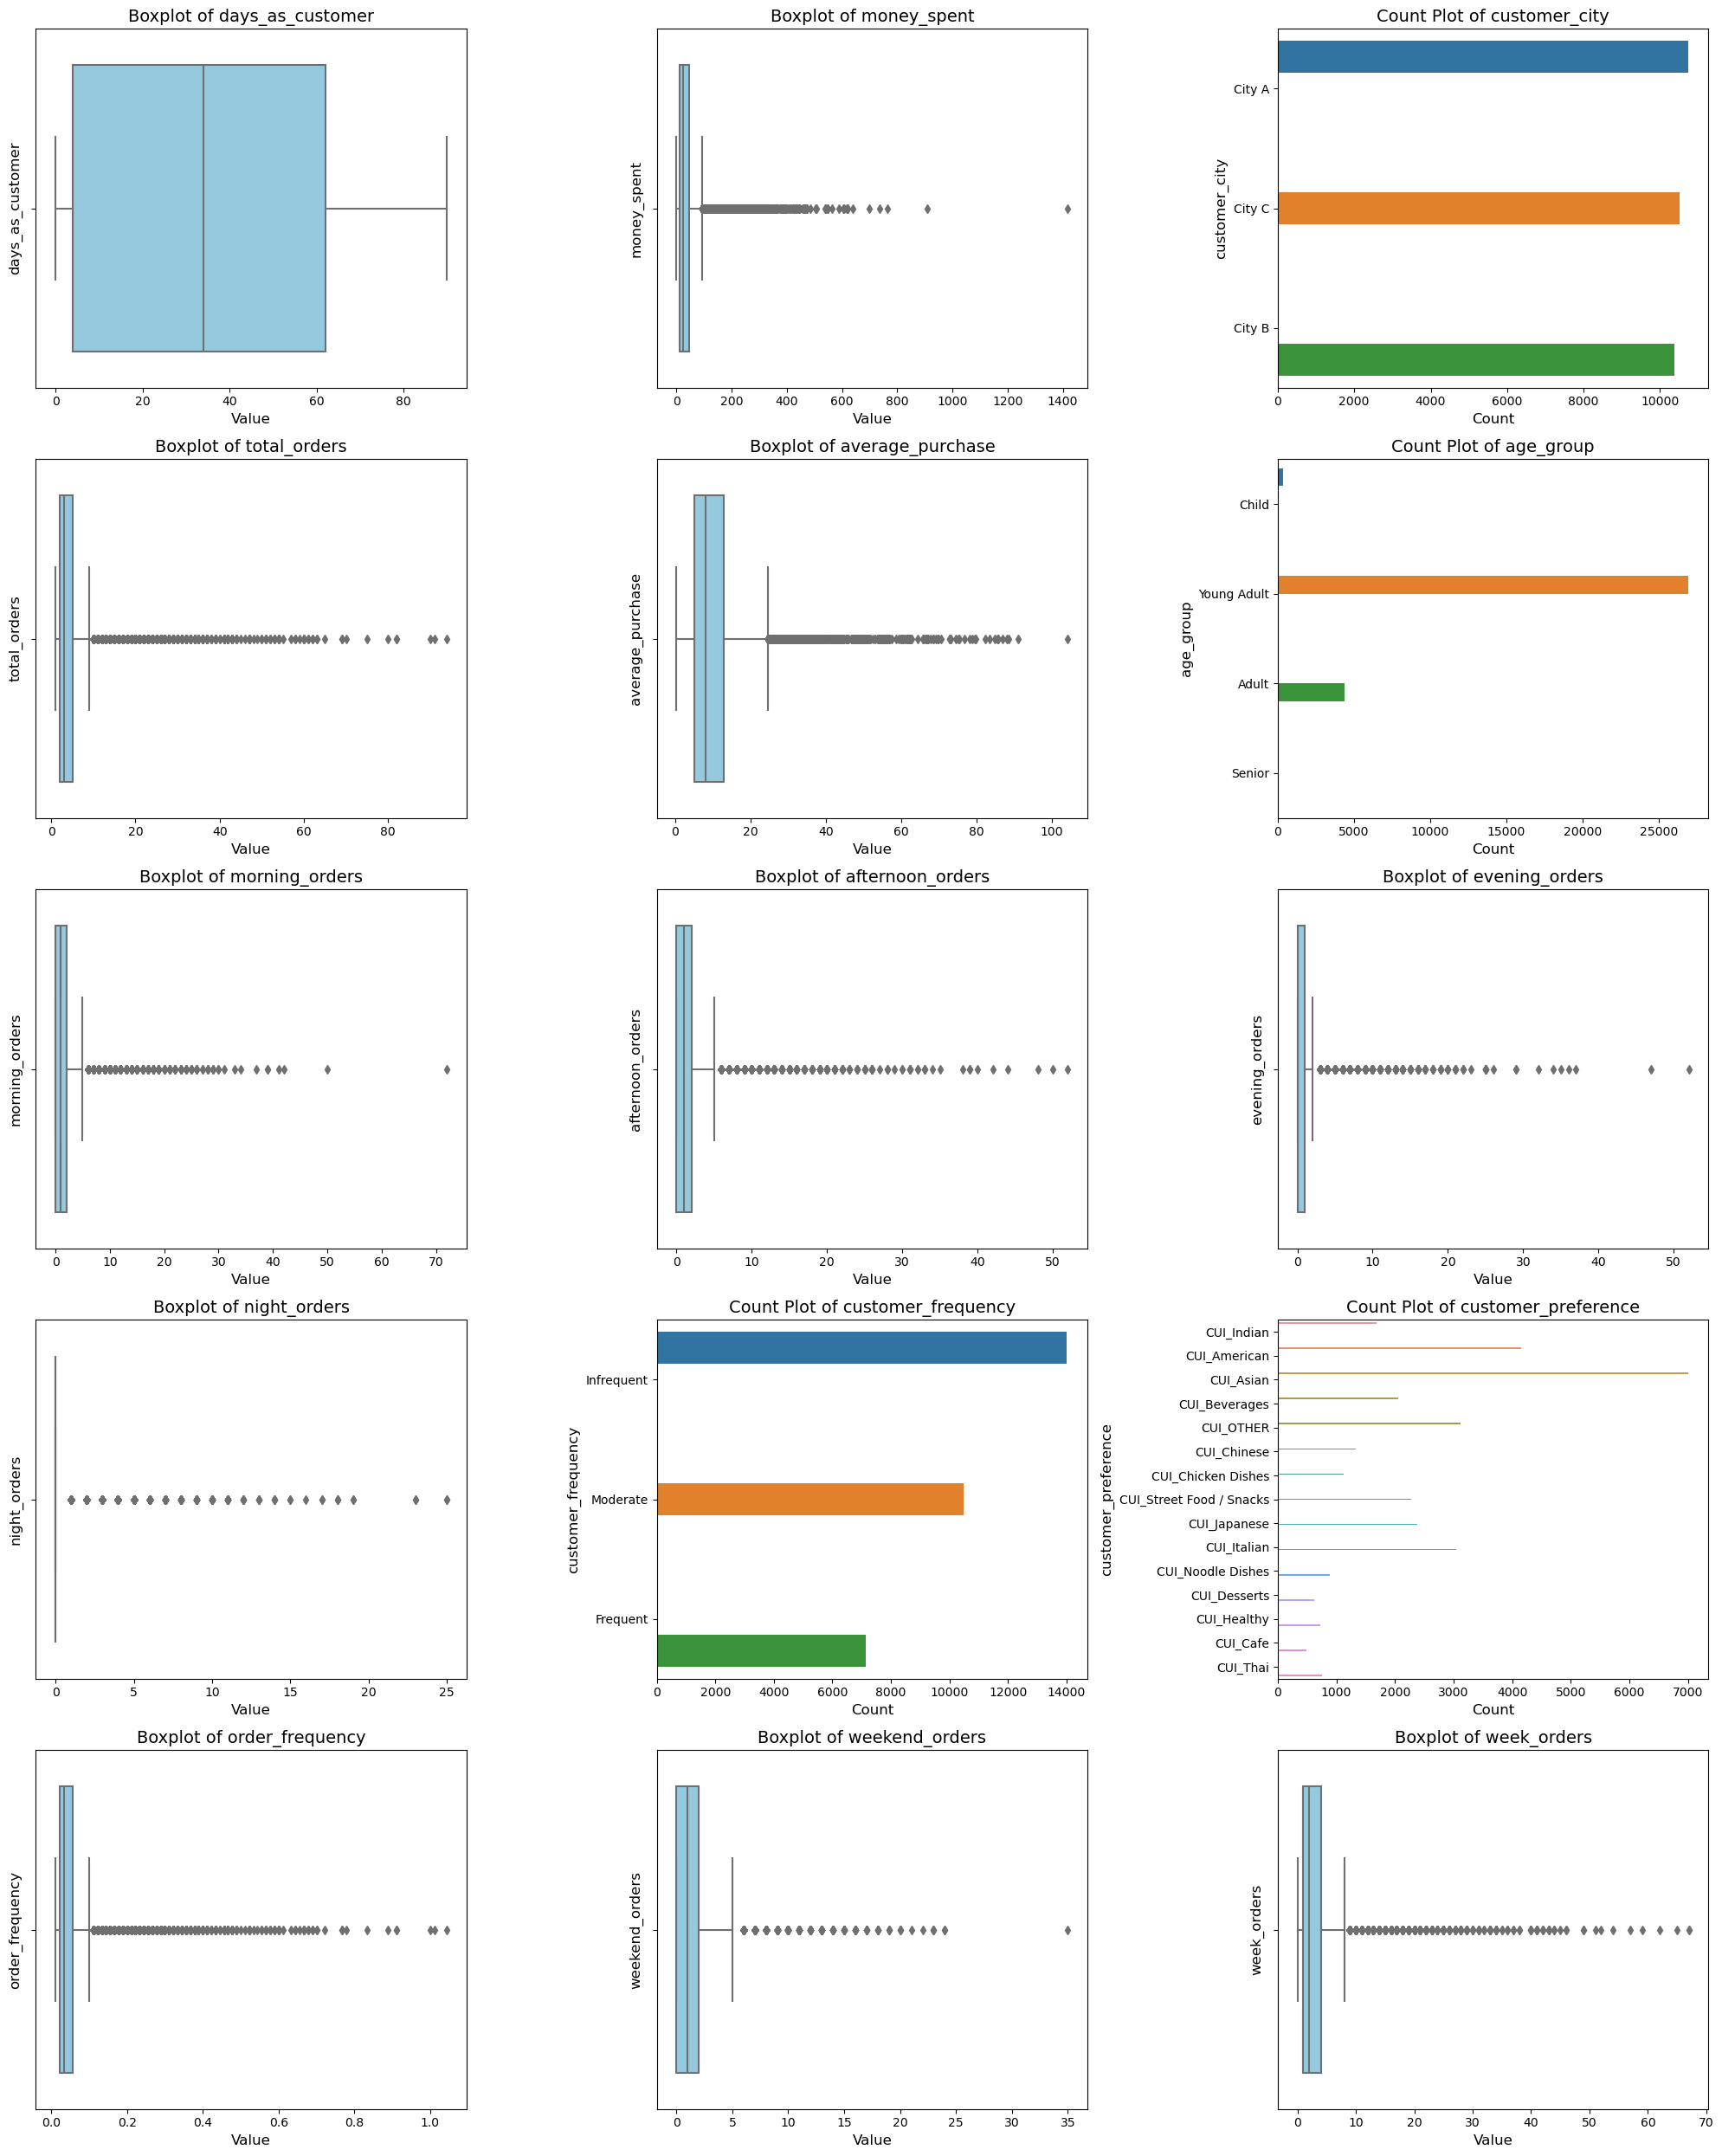

In [83]:
# Create variable of new features
new_features = [
    'days_as_customer', 'money_spent', 'customer_city',
    'total_orders','average_purchase','age_group', 'morning_orders',
    'afternoon_orders', 'evening_orders', 'night_orders',
    'customer_frequency', 'customer_preference','order_frequency',
    'weekend_orders', 'week_orders'
    ]

# Set up the grid for plots
num_features = len(new_features)
cols = 3  
rows = (num_features + cols - 1) // cols  

# Create count plots for categorical features and box plots for numerical features
plt.figure(figsize=(20, 5 * rows))
for i, feature in enumerate(new_features, 1):
    plt.subplot(rows, cols, i)
    
    # Check the df type to determine plot type
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:  #Categorical features
        sns.countplot(y=feature, data=df, hue=feature)
        plt.legend().remove() 
        plt.title(f'Count Plot of {feature}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(feature, fontsize=12)
    else:  # Numerical variables
        sns.boxplot(x=df[feature], color='skyblue')  # Horizontal boxplot
        plt.title(f'Boxplot of {feature}', fontsize=14)
        plt.xlabel('Value', fontsize=12)
        plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

**[Metric Features]**<br>
*days_as_customer*, *money_spent*, *total_orders*, *average_purchase*, *morning_orders*, *afternoon_orders*, *evening_orders*, *night_orders*, *order_frequency*, *weekend_orders*, and *week_orders* <br>
- It can be seen that with the exception of days_as_customer*, all metric features contain outliers that are extreme values. We are going to treat them in the next step. <br><br>

**[Categorical Features]**<br>
- *customer_city*: It seems to be fairly distributed.
- *age_group*: As we mentioned in the Key Statisctics and Trend section, most of customer belong belong to the young adult group (between 18 and 34 years old).
- *customer_frequency*: As we mentioned in the Key Statisctics and Trend section, infrequent (less than three times use) customer group is the largest segment.
- customer_preference: As we mentioned in the Key Statisctics and Trend section, CUI_Asian is the most popular cuisine, followed by CUI_American and CUI_Italian.

<a class="anchor" id="30">     

## 7.3. Treating Outliers of New Features 
</a>   

First, we are going to check the outliers in the metric new features by box plots.

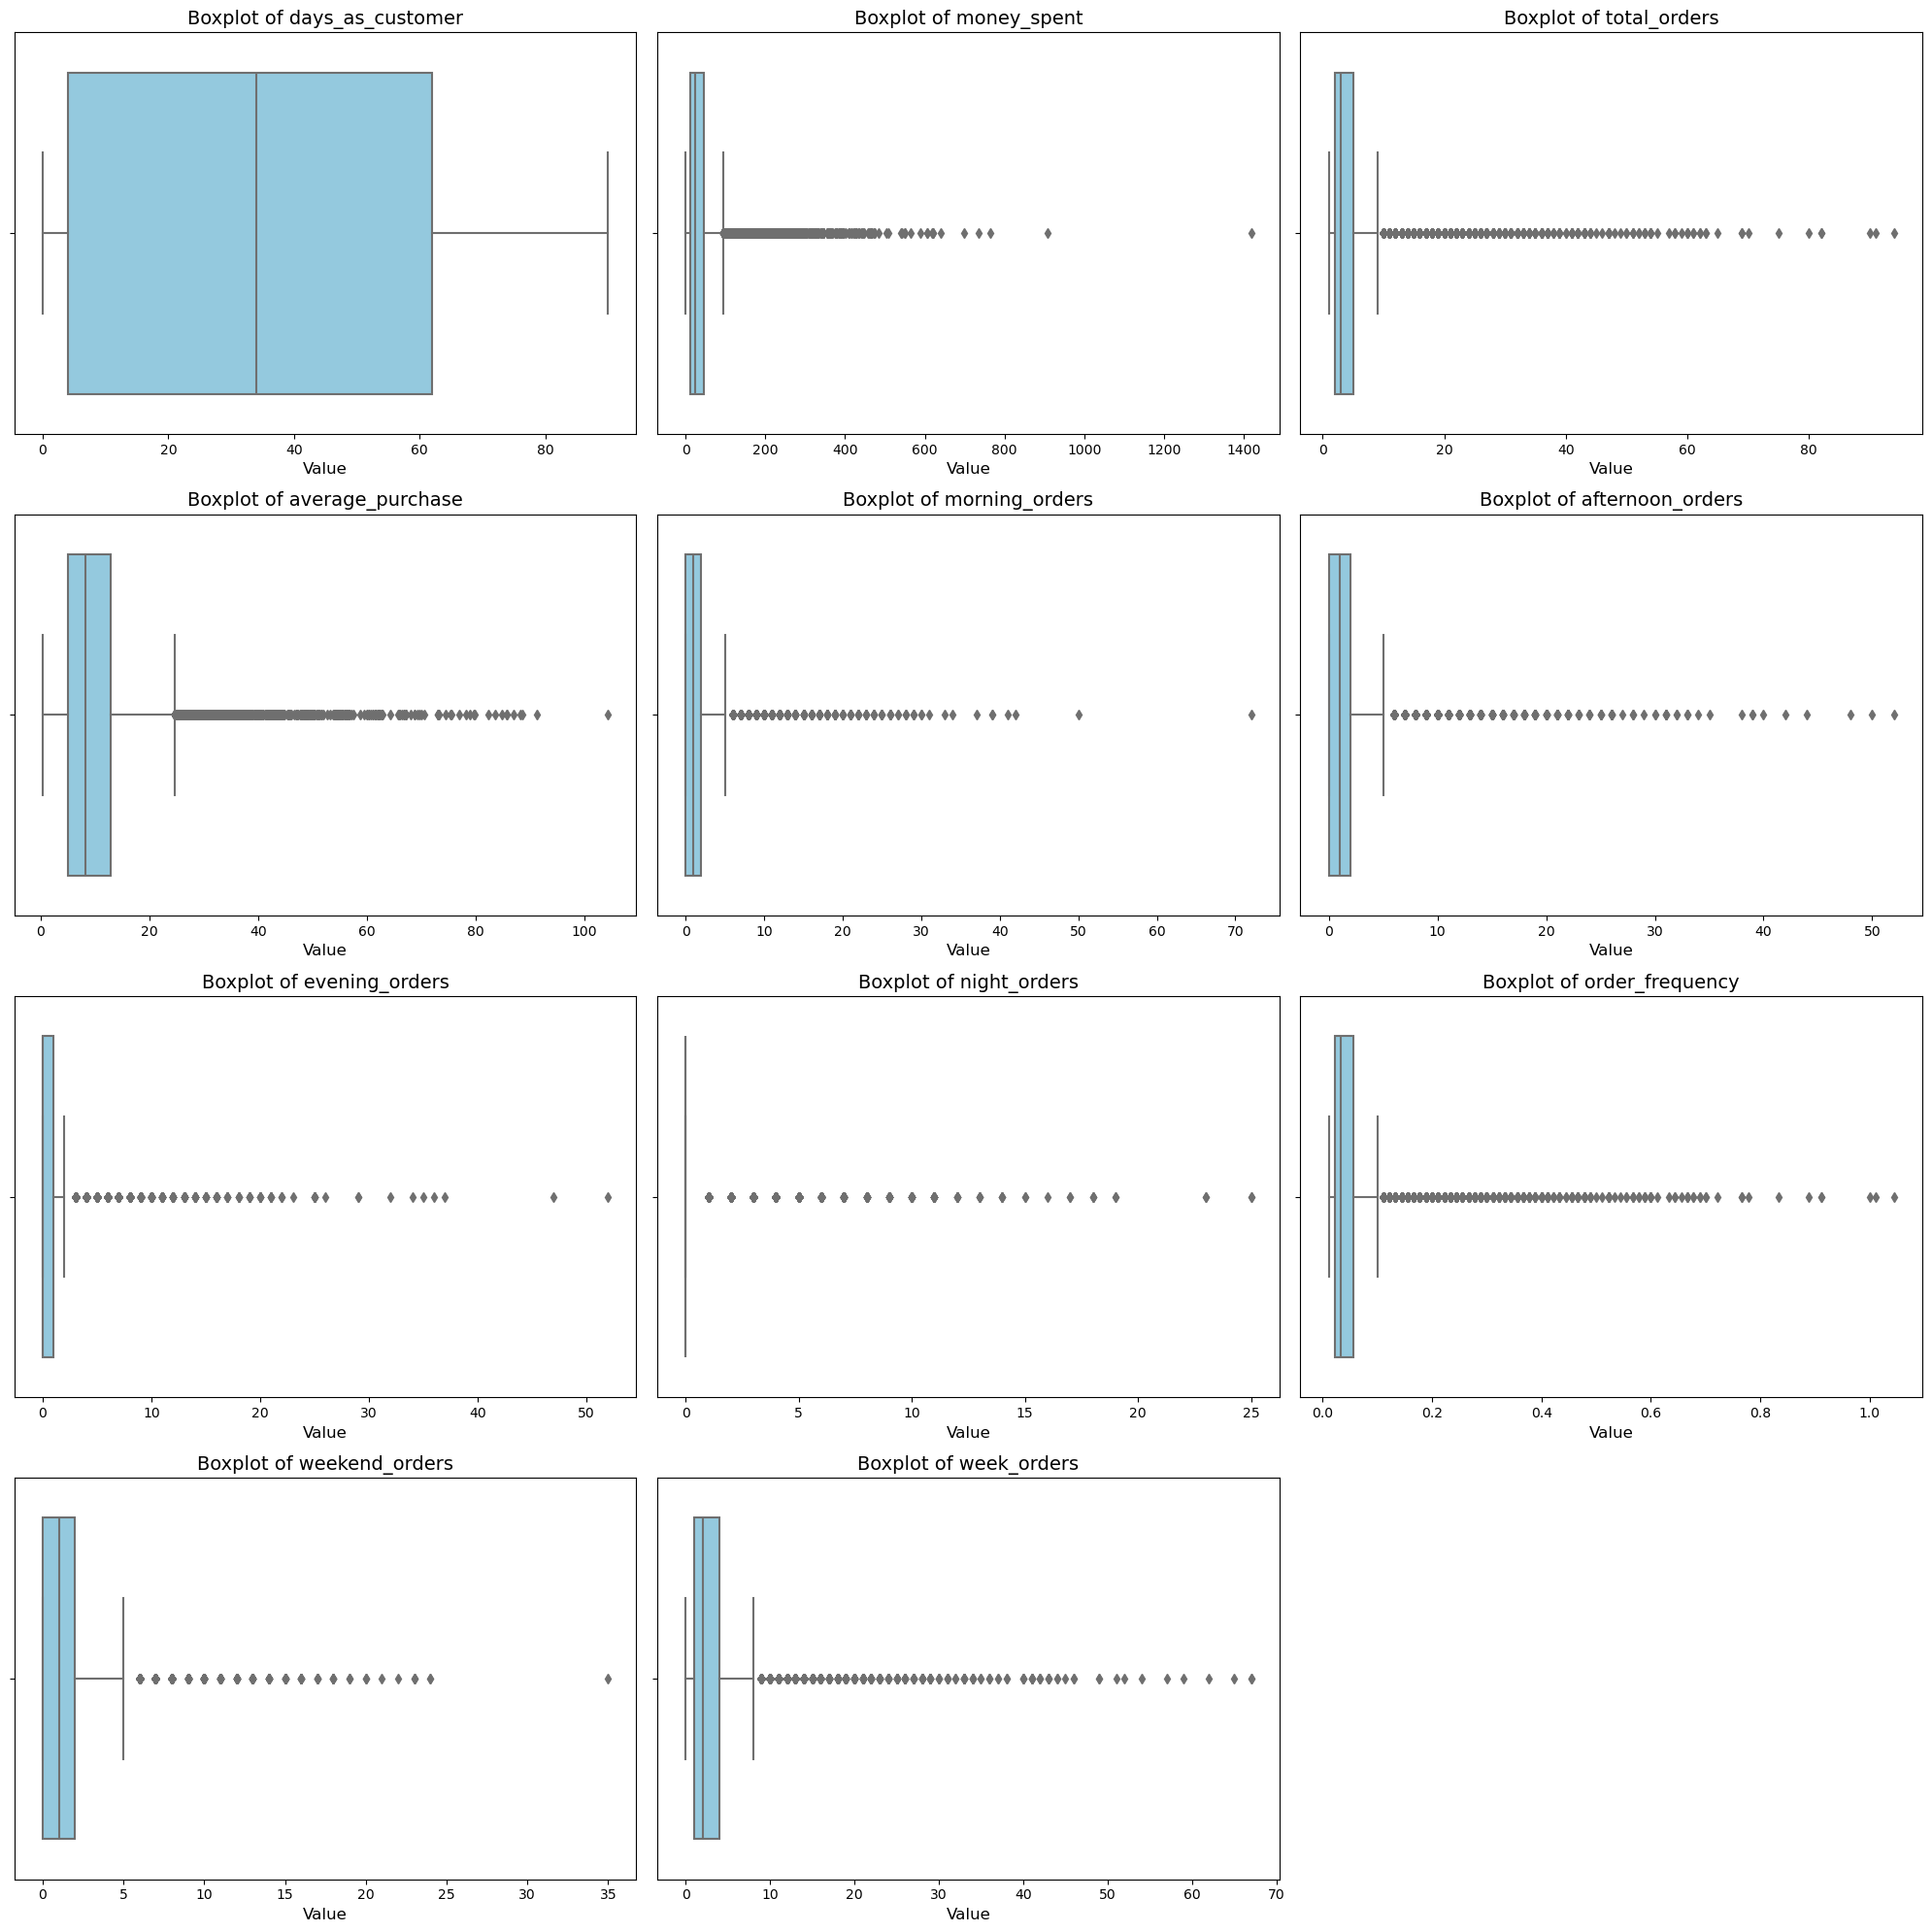

In [84]:
# Create variable of new metric features
new_features_metric = [
    'days_as_customer', 'money_spent',
    'total_orders', 'average_purchase', 'morning_orders',
    'afternoon_orders', 'evening_orders', 'night_orders',
    'order_frequency', 'weekend_orders', 'week_orders'
]

# Set up the grid for plots
num_features = len(new_features_metric)
cols = 3  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate the number of rows needed

# Create box plots for numerical features
plt.figure(figsize=(20, 5 * rows))
for i, feature in enumerate(new_features_metric, 1):
    plt.subplot(rows, cols, i)
    
    # Ensure the feature is numeric before plotting
    if pd.api.types.is_numeric_dtype(df[feature]):
        sns.boxplot(x=df[feature], color='skyblue')  # Horizontal boxplot
        plt.title(f'Boxplot of {feature}', fontsize=14)
        plt.xlabel('Value', fontsize=12)
    else:
        plt.title(f'{feature} is not numeric', fontsize=14)

plt.tight_layout()
plt.show()


From the box plots above, we perceive that there are extreme outliers in the numeric features except *days_as_customer*.<br>
Although we have tried multiple technic to deal with those outliers such as 99th percentile as we have treated outliers in the previous steps ,IQR, and also both of them (hybrid), we believe that the manual outlier treatment would work with our new features. Thus, we are going to set the threshold on all new features, then change the outliers (extreme values) so they stay within acceptable ranges. Therefore, we will not lose any values. <br><br>

We defined the threshold for outliers for each features as follows:
- *money_spent*: 800
- *total_orders*: 75
- *average_purchase*: 100
- *morning_orders*: 45
- *afternoon_orders*: 37
- *evening_orders*: 30
- *night_orders*: 20
- *order_frequency*: 0.8
- *weekend_orders*: 25
- *week_orders*: 50

In [85]:
# Dictionary with features and their corresponding thresholds
feature_thresholds = {
    'money_spent': 800,
    'total_orders': 75,
    'average_purchase': 100,
    'morning_orders': 45,
    'afternoon_orders': 37,
    'evening_orders': 30,
    'night_orders': 20,
    'order_frequency': 0.8,
    'weekend_orders': 25,
    'week_orders': 50
}

# Cap values for each feature based on the thresholds
for feature, threshold in feature_thresholds.items():
    # Count outliers before the treatment
    before_outlier_count = (df[feature] > threshold).sum()  
    # Cap values above the threshold
    df[feature] = df[feature].clip(upper=threshold)  
    # Verify no outliers is left
    after_outlier_count = (df[feature] > threshold).sum()  
    
    print(f"Feature '{feature}': Threshold = {threshold}. "
          f"Capped {before_outlier_count} values. Outliers remaining: {after_outlier_count}")


Feature 'money_spent': Threshold = 800. Capped 2 values. Outliers remaining: 0
Feature 'total_orders': Threshold = 75. Capped 6 values. Outliers remaining: 0
Feature 'average_purchase': Threshold = 100. Capped 1 values. Outliers remaining: 0
Feature 'morning_orders': Threshold = 45. Capped 2 values. Outliers remaining: 0
Feature 'afternoon_orders': Threshold = 37. Capped 9 values. Outliers remaining: 0
Feature 'evening_orders': Threshold = 30. Capped 7 values. Outliers remaining: 0
Feature 'night_orders': Threshold = 20. Capped 4 values. Outliers remaining: 0
Feature 'order_frequency': Threshold = 0.8. Capped 7 values. Outliers remaining: 0
Feature 'weekend_orders': Threshold = 25. Capped 1 values. Outliers remaining: 0
Feature 'week_orders': Threshold = 50. Capped 9 values. Outliers remaining: 0


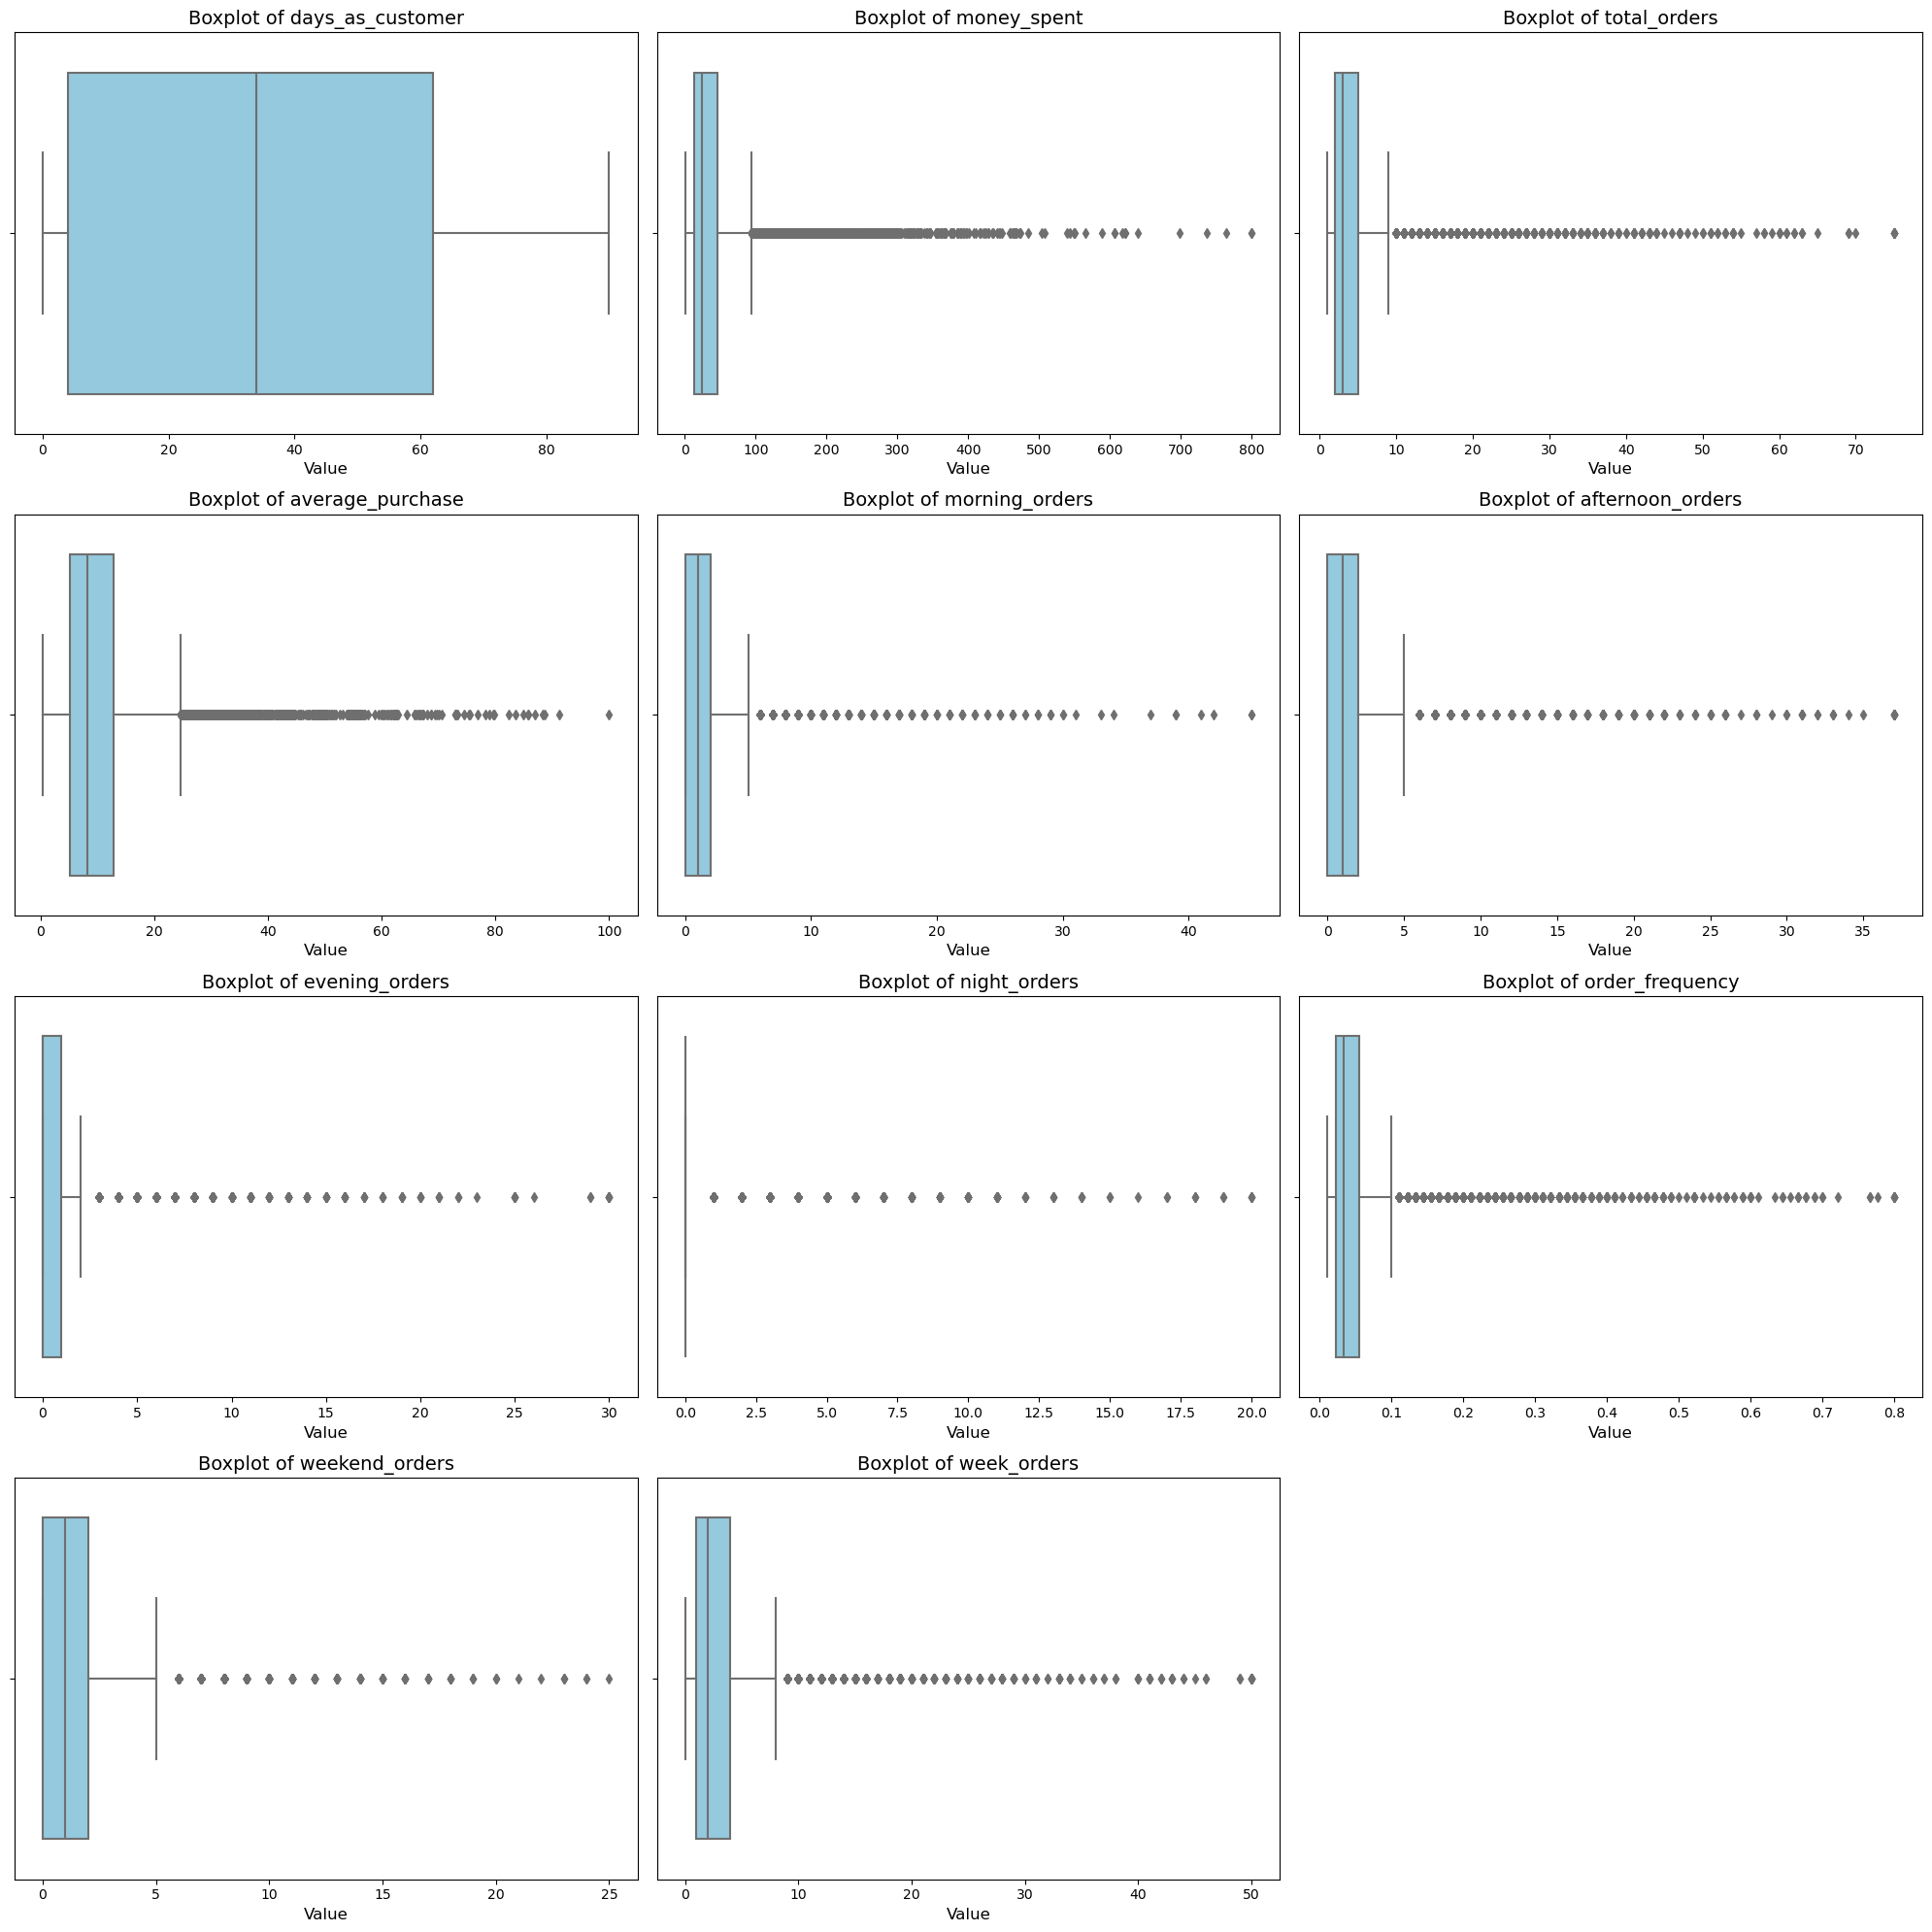

In [86]:
## Check if the change was applied as intended

# Create variable of new metric features
new_features_metric = [
    'days_as_customer', 'money_spent',
    'total_orders', 'average_purchase', 'morning_orders',
    'afternoon_orders', 'evening_orders', 'night_orders',
    'order_frequency', 'weekend_orders', 'week_orders'
]

# Set up the grid for plots
num_features = len(new_features_metric)
cols = 3  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate the number of rows needed

# Create box plots for numerical features
plt.figure(figsize=(20, 5 * rows))
for i, feature in enumerate(new_features_metric, 1):
    plt.subplot(rows, cols, i)
    
    # Ensure the feature is numeric before plotting
    if pd.api.types.is_numeric_dtype(df[feature]):
        sns.boxplot(x=df[feature], color='skyblue')  # Horizontal boxplot
        plt.title(f'Boxplot of {feature}', fontsize=14)
        plt.xlabel('Value', fontsize=12)
    else:
        plt.title(f'{feature} is not numeric', fontsize=14)

plt.tight_layout()
plt.show()


<a class="anchor" id="31">     

# 8. Feature Engineering
</a>    

<a class="anchor" id="32">     

## 8.1. Removing Features
</a>   

We have decided to remove the following features, stating our reasons for doing so.

| Feature | Reason to remove |
|---------|----------------|
| last_promo | It has exaggerated number (16748) of missing values.|
| customer_region | We have created new feature *customer_city* instead. |
| DOW_0, DOW_1, DOW_2, DOW_3, DOW_4, DOW_5, DOW_6 | We have created new feature *total_orders* instead. |
| HR_6, HR_7, HR_8, HR_9, HR_10, HR_11 | We have created new feature *morning_orders* instead. |
| HR_12, HR_13, HR_14, HR_15, HR_16, HR_17 | We have created new feature *afternoon_orders* instead. |
| HR_18, HR_19, HR_20, HR_21, HR_22, HR_23 | We have created new feature *evening_orders* instead. |
| HR_0, HR_1, HR_2, HR_3, HR_4, HR_5 | We have created new feature *night_orders* instead. |
| last_order, first_order | We have created new feature *days_as_customer* instead. |
| CUI_ | We have created new feature *customer_preference* instead. |

In [87]:
# Specify features to remove
columns_to_remove = [
    'customer_region', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
    'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9',
    'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
    'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'first_order', 'last_order',
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 
    'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
    'CUI_Thai', 'last_promo'
]

# Remove features by keeping only columns not in the remove list from the dataset
df = df[[col for col in df.columns if col not in columns_to_remove]]


In [88]:
# Check if the change was applied correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customer_id          31631 non-null  object  
 1   customer_age         31631 non-null  float64 
 2   vendor_count         31631 non-null  float64 
 3   product_count        31631 non-null  float64 
 4   is_chain             31631 non-null  bool    
 5   payment_method       31631 non-null  object  
 6   days_as_customer     31631 non-null  int64   
 7   money_spent          31631 non-null  float64 
 8   customer_city        31631 non-null  object  
 9   total_orders         31631 non-null  int64   
 10  average_purchase     31631 non-null  float64 
 11  age_group            31631 non-null  category
 12  morning_orders       31631 non-null  int64   
 13  afternoon_orders     31631 non-null  int64   
 14  evening_orders       31631 non-null  int64   
 15  night_orders         316

<a class="anchor" id="33">     

## 8.2. Changing Data Types
</a>  

In [89]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customer_id          31631 non-null  object  
 1   customer_age         31631 non-null  float64 
 2   vendor_count         31631 non-null  float64 
 3   product_count        31631 non-null  float64 
 4   is_chain             31631 non-null  bool    
 5   payment_method       31631 non-null  object  
 6   days_as_customer     31631 non-null  int64   
 7   money_spent          31631 non-null  float64 
 8   customer_city        31631 non-null  object  
 9   total_orders         31631 non-null  int64   
 10  average_purchase     31631 non-null  float64 
 11  age_group            31631 non-null  category
 12  morning_orders       31631 non-null  int64   
 13  afternoon_orders     31631 non-null  int64   
 14  evening_orders       31631 non-null  int64   
 15  night_orders         316

We have decided to convert the data types of the following features for data scalling process.
- *is_chain*: Boolean to Object
- *age_group*: Category to Object
- *customer_frequency*: Category to Object
- *customer_age*: Float to Integer
- *vendor_count*: Float to Integer
- *product_count*: Float to Integer

In [90]:
#List of features to convert to object
object_columns=['is_chain','age_group','customer_frequency']

# Change the data type to object
for dataset in [df]:
    dataset[object_columns] = dataset[object_columns].astype('object')

In [91]:
#List of features to convert to integer
int_columns = ['customer_age', 'vendor_count', 'product_count']

# Change the data type to integer
for dataset in [df]:
    dataset[int_columns] = dataset[int_columns].astype('int')

In [92]:
# Check if the change was applied correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          31631 non-null  object 
 1   customer_age         31631 non-null  int64  
 2   vendor_count         31631 non-null  int64  
 3   product_count        31631 non-null  int64  
 4   is_chain             31631 non-null  object 
 5   payment_method       31631 non-null  object 
 6   days_as_customer     31631 non-null  int64  
 7   money_spent          31631 non-null  float64
 8   customer_city        31631 non-null  object 
 9   total_orders         31631 non-null  int64  
 10  average_purchase     31631 non-null  float64
 11  age_group            31631 non-null  object 
 12  morning_orders       31631 non-null  int64  
 13  afternoon_orders     31631 non-null  int64  
 14  evening_orders       31631 non-null  int64  
 15  night_orders         31631 non-null  int6

<a class="anchor" id="34">     

## 8.3. Splitting Metric Features and Non-Metric Features
</a>  

In [93]:
# Splitting feature names into groups
metric_features = [
    'vendor_count',
    'product_count',
    'customer_age',
    'days_as_customer',
    'money_spent',
    'total_orders',
    'average_purchase',
    'morning_orders',
    'afternoon_orders',                
    'evening_orders',
    'night_orders',
    'order_frequency',
    'weekend_orders',
    'week_orders'
 ]

non_metric_features = [
    'is_chain',
    'payment_method',
    'customer_city',
    'age_group',	
    'customer_frequency',
    'customer_preference'
]

In [94]:
df[metric_features].head(3)

,vendor_count,product_count,customer_age,days_as_customer,money_spent,total_orders,average_purchase,morning_orders,afternoon_orders,evening_orders,night_orders,order_frequency,weekend_orders,week_orders
0,2,5,18,1,28.88,2,14.440,0,0,2,0,0.022222,2,0
1,2,2,17,1,19.21,2,9.605,2,0,0,0,0.022222,2,0
2,1,2,38,1,9.20,2,4.600,2,0,0,0,0.022222,2,0


In [95]:
df[non_metric_features].head(3)

,is_chain,payment_method,customer_city,age_group,customer_frequency,customer_preference
0,True,DIGI,City A,Young Adult,Infrequent,CUI_Indian
1,True,DIGI,City C,Child,Infrequent,CUI_American
2,True,CASH,City B,Adult,Infrequent,CUI_American


<a class="anchor" id="35">     

# 9. Data Scaling (WIP: try different scaler)
</a>

In [96]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df[metric_features])

# Convert back to a DataFrame with original column names
df[metric_features] = scaler.fit_transform(df[metric_features])

In [97]:
# Check if the change was applied correctly
df.head()

,customer_id,customer_age,vendor_count,product_count,is_chain,payment_method,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,weekend_orders,week_orders
0,1b8f824d5e,0.081081,0.076923,0.147059,True,DIGI,0.011111,0.035654,City A,0.013514,0.141223,Young Adult,0.000000,0.000000,0.066667,0.0,Infrequent,CUI_Indian,0.014085,0.08,0.00
1,5d272b9dcb,0.054054,0.076923,0.058824,True,DIGI,0.011111,0.023561,City C,0.013514,0.092693,Child,0.044444,0.000000,0.000000,0.0,Infrequent,CUI_American,0.014085,0.08,0.00
2,f6d1b2ba63,0.621622,0.000000,0.058824,True,CASH,0.011111,0.011043,City B,0.013514,0.042457,Adult,0.044444,0.000000,0.000000,0.0,Infrequent,CUI_American,0.014085,0.08,0.00
3,180c632ed8,0.297297,0.076923,0.088235,True,DIGI,0.022222,0.039006,City B,0.013514,0.154672,Young Adult,0.022222,0.027027,0.000000,0.0,Infrequent,CUI_Indian,0.014085,0.04,0.02
4,4eb37a6705,0.135135,0.076923,0.147059,False,DIGI,0.022222,0.068869,City B,0.013514,0.274516,Young Adult,0.044444,0.000000,0.000000,0.0,Infrequent,CUI_Asian,0.014085,0.04,0.02


<a class="anchor" id="36">     

# 10. Checking Redundancy and Relevancy
</a>

In [98]:
# Create a variable that gives us the correlation map of the metric features
correlation_matrix = df[metric_features].corr()

correlation_matrix

,vendor_count,product_count,customer_age,days_as_customer,money_spent,total_orders,average_purchase,morning_orders,afternoon_orders,evening_orders,night_orders,order_frequency,weekend_orders,week_orders
vendor_count,1.000000,0.851414,0.002549,0.639970,0.640315,0.816226,-0.170877,0.552632,0.582346,0.516195,0.252486,0.817289,0.676627,0.783320
product_count,0.851414,1.000000,0.006528,0.628945,0.807682,0.932219,-0.053773,0.630103,0.714619,0.551866,0.232077,0.933260,0.766300,0.897478
customer_age,0.002549,0.006528,1.000000,0.006471,0.008786,0.004005,0.001508,-0.002316,0.008674,0.002394,-0.001122,0.003998,0.007128,0.002025
days_as_customer,0.639970,0.628945,0.006471,1.000000,0.472892,0.596187,-0.212027,0.387398,0.469260,0.339616,0.176884,0.597030,0.492014,0.573335
money_spent,0.640315,0.807682,0.008786,0.472892,1.000000,0.733782,0.292053,0.588557,0.511494,0.252950,0.399902,0.733983,0.600329,0.707107
total_orders,0.816226,0.932219,0.004005,0.596187,0.733782,1.000000,-0.169662,0.684267,0.767827,0.606724,0.198948,0.999963,0.819298,0.962197
average_purchase,-0.170877,-0.053773,0.001508,-0.212027,0.292053,-0.169662,1.000000,-0.038504,-0.178312,-0.247037,0.150474,-0.169893,-0.140165,-0.163035
morning_orders,0.552632,0.630103,-0.002316,0.387398,0.588557,0.684267,-0.038504,1.000000,0.294494,0.136856,0.122752,0.683893,0.550544,0.662429
afternoon_orders,0.582346,0.714619,0.008674,0.469260,0.511494,0.767827,-0.178312,0.294494,1.000000,0.345715,-0.115989,0.767905,0.627562,0.739792
evening_orders,0.516195,0.551866,0.002394,0.339616,0.252950,0.606724,-0.247037,0.136856,0.345715,1.000000,-0.089272,0.606724,0.511625,0.577236


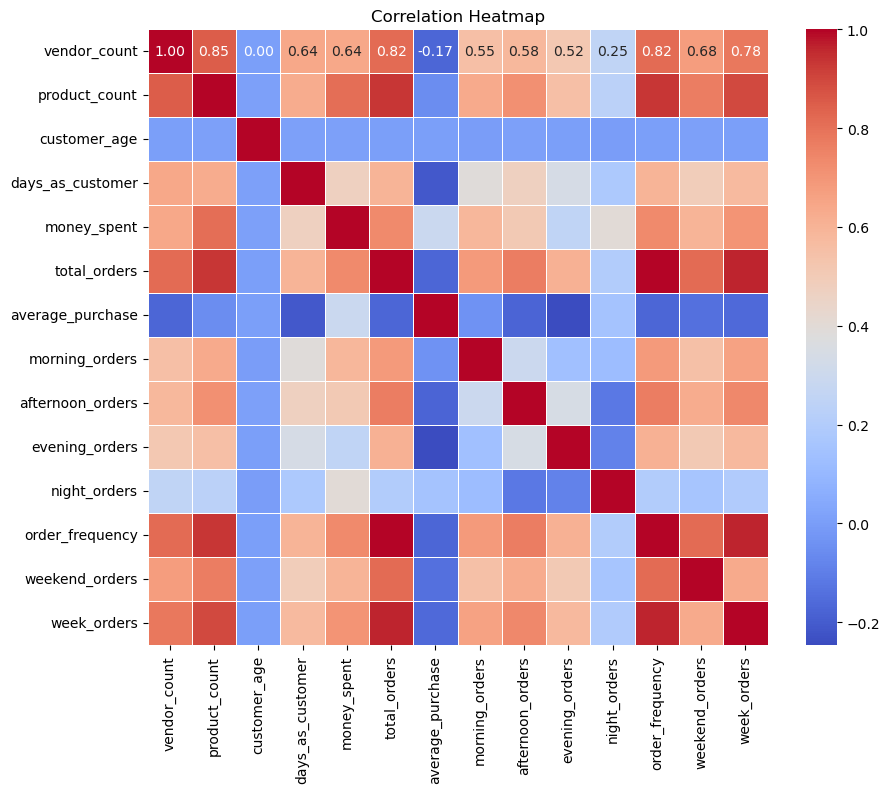

In [99]:
# Create a heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

In [100]:
threshold = 0.8

# Find feature pairs with correlation greater than the threshold
high_corr_pairs = correlation_matrix.stack()[correlation_matrix.stack() > threshold]

# Extract unique features that are part of these high correlations
unique_features = set(high_corr_pairs.index.get_level_values(0)).union(
    set(high_corr_pairs.index.get_level_values(1))
)

# Print results
print("Highly Correlated Pairs:")
print(high_corr_pairs)
print("\nNumber of unique features involved in high correlations:")
print(len(unique_features))

Highly Correlated Pairs:
vendor_count      vendor_count        1.000000
                  product_count       0.851414
                  total_orders        0.816226
                  order_frequency     0.817289
product_count     vendor_count        0.851414
                  product_count       1.000000
                  money_spent         0.807682
                  total_orders        0.932219
                  order_frequency     0.933260
                  week_orders         0.897478
customer_age      customer_age        1.000000
days_as_customer  days_as_customer    1.000000
money_spent       product_count       0.807682
                  money_spent         1.000000
total_orders      vendor_count        0.816226
                  product_count       0.932219
                  total_orders        1.000000
                  order_frequency     0.999963
                  weekend_orders      0.819298
                  week_orders         0.962197
average_purchase  average_purchase 

In [101]:
# Calculate pairwise correlations
threshold = 0.8
high_corr_pairs = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1)]

In [102]:
high_corr_pairs

,vendor_count,product_count,customer_age,days_as_customer,money_spent,total_orders,average_purchase,morning_orders,afternoon_orders,evening_orders,night_orders,order_frequency,weekend_orders,week_orders
vendor_count,NaN,0.851414,NaN,NaN,NaN,0.816226,NaN,NaN,NaN,NaN,NaN,0.817289,NaN,NaN
product_count,0.851414,NaN,NaN,NaN,0.807682,0.932219,NaN,NaN,NaN,NaN,NaN,0.933260,NaN,0.897478
customer_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_as_customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money_spent,NaN,0.807682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_orders,0.816226,0.932219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999963,0.819298,0.962197
average_purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
morning_orders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
afternoon_orders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
evening_orders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# vendor_count
# day_as_customer
# money_spent
# total_orders
# average_purchase
# morning_orders
# afternoon_orders
# evening_orders
# weekend_orders

redundant_features = [
    'product_count',
    'order_frequency',
    'week_orders'
]

irrelevent_features = [
    'night_orders',
    'customer_age'
]

In [104]:
# metric_features.remove('product_count')
# metric_features.remove('order_frequency')
# metric_features.remove('week_orders')
# metric_features.remove('night_orders')
# metric_features.remove('customer_age')

In [105]:
df[metric_features].head(3)

,vendor_count,product_count,customer_age,days_as_customer,money_spent,total_orders,average_purchase,morning_orders,afternoon_orders,evening_orders,night_orders,order_frequency,weekend_orders,week_orders
0,0.076923,0.147059,0.081081,0.011111,0.035654,0.013514,0.141223,0.000000,0.0,0.066667,0.0,0.014085,0.08,0.0
1,0.076923,0.058824,0.054054,0.011111,0.023561,0.013514,0.092693,0.044444,0.0,0.000000,0.0,0.014085,0.08,0.0
2,0.000000,0.058824,0.621622,0.011111,0.011043,0.013514,0.042457,0.044444,0.0,0.000000,0.0,0.014085,0.08,0.0


In [106]:
df.head(3)

,customer_id,customer_age,vendor_count,product_count,is_chain,payment_method,days_as_customer,money_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,weekend_orders,week_orders
0,1b8f824d5e,0.081081,0.076923,0.147059,True,DIGI,0.011111,0.035654,City A,0.013514,0.141223,Young Adult,0.000000,0.0,0.066667,0.0,Infrequent,CUI_Indian,0.014085,0.08,0.0
1,5d272b9dcb,0.054054,0.076923,0.058824,True,DIGI,0.011111,0.023561,City C,0.013514,0.092693,Child,0.044444,0.0,0.000000,0.0,Infrequent,CUI_American,0.014085,0.08,0.0
2,f6d1b2ba63,0.621622,0.000000,0.058824,True,CASH,0.011111,0.011043,City B,0.013514,0.042457,Adult,0.044444,0.0,0.000000,0.0,Infrequent,CUI_American,0.014085,0.08,0.0


# Exporting The Dataset

In [107]:
# Specify the file path and format
output_file = 'project_data/preprocessed_dataset.csv'  # You can change the file name and path

# Export the dataset to a CSV file
df.to_csv(output_file, index=False)

print(f"Dataset exported successfully to {output_file}")

Dataset exported successfully to project_data/preprocessed_dataset.csv
